## Part 1: Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Set figure size for all plots
plt.rcParams['figure.figsize'] = [12, 6]

## Part 2: Load and Prepare Time Series Data

In [2]:
# Time series analysis for the 6 product groups
# - loads data, maps product groups to names, creates daily time series
import pandas as pd
import numpy as np
from pathlib import Path

# locate CSV (prefer local notebook folder)
data_path = Path('umsatzdaten_gekuerzt.csv')
if not data_path.exists():
    data_path = Path('../0_DataPreparation/umsatzdaten_gekuerzt.csv')

print('Loading', data_path)
df = pd.read_csv(data_path, parse_dates=['Datum'])
print('Raw rows:', len(df))

# keep only the six product groups 1..6 and map names
groups = {1: 'bread', 2: 'rolls', 3: 'croissant', 4: 'pastry', 5: 'cakes', 6: 'seasonal'}
df = df[df['Warengruppe'].isin(groups.keys())].copy()
df['Product'] = df['Warengruppe'].map(groups)

# aggregate to daily sales per product
daily = df.groupby(['Datum', 'Product'])['Umsatz'].sum().unstack(fill_value=0).sort_index()
# ensure a continuous daily index and fill missing days with 0
full_idx = pd.date_range(daily.index.min(), daily.index.max(), freq='D')
daily = daily.reindex(full_idx).fillna(0)
daily.index.name = 'Datum'

print(f'Daily data shape: {daily.shape}')
print(f'Date range: {daily.index.min()} to {daily.index.max()}')
daily.head()

Loading umsatzdaten_gekuerzt.csv
Raw rows: 9334
Daily data shape: (1857, 6)
Date range: 2013-07-01 00:00:00 to 2018-07-31 00:00:00


Product,bread,cakes,croissant,pastry,rolls,seasonal
Datum,,,,,,
2013-07-01,148.828353,317.475875,201.198426,65.890169,535.856285,0.0
2013-07-02,159.793757,383.628682,265.261254,74.543917,546.780787,0.0
2013-07-03,111.885594,305.523072,210.260241,69.262728,427.343259,0.0
2013-07-04,168.864941,308.408168,190.686641,61.490175,454.859641,0.0
2013-07-05,171.280754,355.518770,181.644870,86.759861,492.818804,0.0


## Part 3: Generate German Holidays

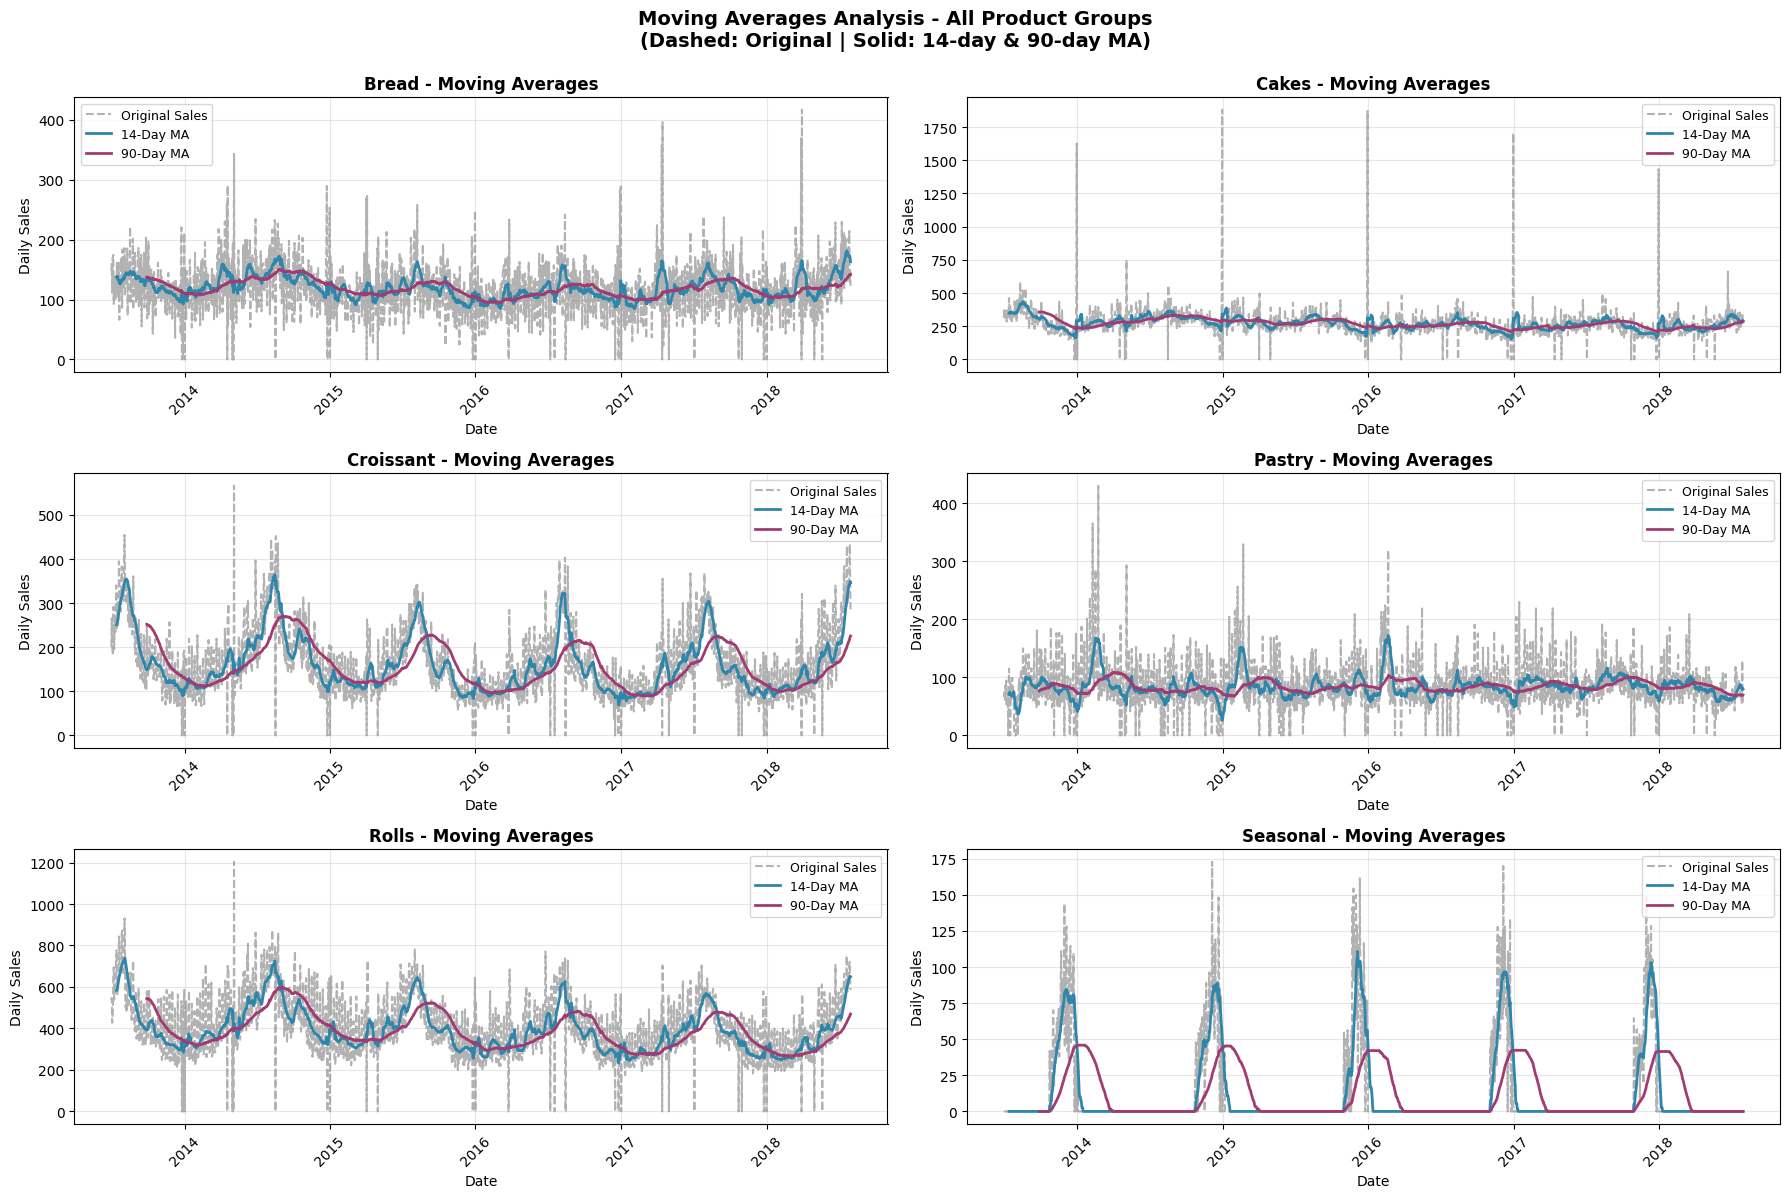

✓ Moving averages calculated and visualized for all products

Data summary (last 10 days):


Product,bread,rolls,croissant,pastry,cakes,seasonal,total_sales
Datum,,,,,,,
2018-07-22,130.857888,724.318116,429.920288,82.371806,259.770399,0.0,1627.238498
2018-07-23,170.806669,577.958779,325.690203,78.443256,353.698259,0.0,1506.597165
2018-07-24,157.350120,595.267965,302.396426,66.275318,240.303090,0.0,1361.592919
2018-07-25,133.595168,651.748088,337.228464,73.459923,230.939921,0.0,1426.971564
2018-07-26,202.537259,628.287763,339.641098,70.236545,326.006064,0.0,1566.708729
2018-07-27,198.225523,677.415844,333.774099,65.563734,297.867853,0.0,1572.847053
2018-07-28,214.470393,716.576825,371.819770,54.047422,290.024007,0.0,1646.938417
2018-07-29,129.801991,721.822447,433.820697,128.952852,335.823557,0.0,1750.221545
2018-07-30,148.541340,616.358562,348.770346,71.822977,324.965348,0.0,1510.458573


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate moving averages for each product
daily_ma = daily.copy()
daily_ma['ma_14'] = daily.mean(axis=1).rolling(window=14, center=False).mean()
daily_ma['ma_90'] = daily.mean(axis=1).rolling(window=90, center=False).mean()

# Get total sales per day (sum across all products)
daily['total_sales'] = daily.sum(axis=1)
total_ma_14 = daily['total_sales'].rolling(window=14, center=False).mean()
total_ma_90 = daily['total_sales'].rolling(window=90, center=False).mean()

# Plot: Original sales (dashed) vs 14-day MA (solid) vs 90-day MA (solid)
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

for idx, product in enumerate(daily.columns[:-1]):  # Skip 'total_sales'
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Calculate moving averages for this product
    ma_14 = daily[product].rolling(window=14, center=False).mean()
    ma_90 = daily[product].rolling(window=90, center=False).mean()
    
    # Plot original data as dashed line
    ax.plot(daily.index, daily[product], linestyle='--', linewidth=1.5, 
            color='gray', alpha=0.6, label='Original Sales')
    
    # Plot 14-day MA as solid line
    ax.plot(daily.index, ma_14, linestyle='-', linewidth=2, 
            color='#2E86AB', label='14-Day MA')
    
    # Plot 90-day MA as solid line
    ax.plot(daily.index, ma_90, linestyle='-', linewidth=2, 
            color='#A23B72', label='90-Day MA')
    
    ax.set_title(f'{product.capitalize()} - Moving Averages', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Daily Sales', fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Remove the extra subplot if there are only 6 products
if len(daily.columns[:-1]) < 6:
    fig.delaxes(axes[2, 1])

plt.suptitle('Moving Averages Analysis - All Product Groups\n(Dashed: Original | Solid: 14-day & 90-day MA)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ Moving averages calculated and visualized for all products")
print(f"\nData summary (last 10 days):")
display(daily[['bread', 'rolls', 'croissant', 'pastry', 'cakes', 'seasonal', 'total_sales']].tail(10))

## Part 2b: Moving Averages Analysis

In [5]:
import pandas as pd
from pathlib import Path

# Use the python-holidays package to generate German holidays
# This is more reliable than the external CSV source
try:
    import holidays
    print("Using holidays package to generate German holidays...")
    
    # Determine years from the existing daily index
    start_year = daily.index.min().year
    end_year = daily.index.max().year
    years = list(range(start_year, end_year + 1))
    
    # Create Germany holidays for these years
    de_h = holidays.Germany(years=years)
    hol_list = [{'date': pd.to_datetime(d), 'holiday': name} for d, name in sorted(de_h.items())]
    hol_df = pd.DataFrame(hol_list)
    
except ImportError:
    print("holidays package not found. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'holidays', '-q'])
    import holidays
    
    start_year = daily.index.min().year
    end_year = daily.index.max().year
    years = list(range(start_year, end_year + 1))
    
    de_h = holidays.Germany(years=years)
    hol_list = [{'date': pd.to_datetime(d), 'holiday': name} for d, name in sorted(de_h.items())]
    hol_df = pd.DataFrame(hol_list)

# Save CSV
out_path = Path('holidays_germany.csv')
hol_df.to_csv(out_path, index=False)
print(f'✓ Saved {len(hol_df)} holidays to: {out_path.absolute()}')
print(f'\nDate range: {hol_df["date"].min()} to {hol_df["date"].max()}')
display(hol_df.head(15))

Using holidays package to generate German holidays...
✓ Saved 55 holidays to: /workspaces/datascience-project-new/0_DataPreparation/holidays_germany.csv

Date range: 2013-01-01 00:00:00 to 2018-12-26 00:00:00
✓ Saved 55 holidays to: /workspaces/datascience-project-new/0_DataPreparation/holidays_germany.csv

Date range: 2013-01-01 00:00:00 to 2018-12-26 00:00:00


,date,holiday
0,2013-01-01,Neujahr
1,2013-03-29,Karfreitag
2,2013-04-01,Ostermontag
3,2013-05-01,Erster Mai
4,2013-05-09,Christi Himmelfahrt
5,2013-05-20,Pfingstmontag
6,2013-10-03,Tag der Deutschen Einheit
7,2013-12-25,Erster Weihnachtstag
8,2013-12-26,Zweiter Weihnachtstag
9,2014-01-01,Neujahr


## Part 4: Holiday Impact Analysis

In [6]:
# Holiday Impact Timeline Analysis
# Analyze which product groups sold more around which holidays
# Shows sales patterns in a 14-day window (7 days before, day of, 7 days after)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Load holidays CSV
hol_path = Path('holidays_germany.csv')
if not hol_path.exists():
    hol_path = Path('../0_DataPreparation/holidays_germany.csv')

holidays_df = pd.read_csv(hol_path, parse_dates=['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date']).dt.normalize()

print(f"Loaded {len(holidays_df)} holidays")
print(f"Holiday date range: {holidays_df['date'].min()} to {holidays_df['date'].max()}")

# Filter holidays to those within the sales data range
holidays_df = holidays_df[(holidays_df['date'] >= daily.index.min()) & 
                          (holidays_df['date'] <= daily.index.max())].reset_index(drop=True)

print(f"Holidays in data range: {len(holidays_df)}")
print(f"\nHolidays covered:")
display(holidays_df)

# For each holiday, compute sales metrics in surrounding days (±7 days)
window_days = 7
results = []

for idx, row in holidays_df.iterrows():
    hol_date = row['date']
    hol_name = row['holiday']
    
    # Create a window: 7 days before to 7 days after
    start_window = hol_date - pd.Timedelta(days=window_days)
    end_window = hol_date + pd.Timedelta(days=window_days)
    
    # Extract sales in this window
    window_data = daily.loc[(daily.index >= start_window) & (daily.index <= end_window)].copy()
    
    if len(window_data) == 0:
        continue
    
    # For each product, compute key metrics
    for product in daily.columns:
        sales_series = window_data[product]
        
        # Get sales on the holiday itself
        holiday_sales = daily.loc[hol_date, product] if hol_date in daily.index else np.nan
        
        # Average sales before holiday (−7 to −1 days)
        before = daily.loc[(daily.index >= start_window) & (daily.index < hol_date), product]
        avg_before = before.mean() if len(before) > 0 else np.nan
        
        # Average sales after holiday (+1 to +7 days)
        after = daily.loc[(daily.index > hol_date) & (daily.index <= end_window), product]
        avg_after = after.mean() if len(after) > 0 else np.nan
        
        # Change metrics
        pct_change_holiday = ((holiday_sales - avg_before) / (avg_before + 1e-9)) * 100 if not np.isnan(avg_before) else np.nan
        pct_change_after = ((avg_after - avg_before) / (avg_before + 1e-9)) * 100 if not np.isnan(avg_before) else np.nan
        
        results.append({
            'holiday': hol_name,
            'holiday_date': hol_date,
            'product': product,
            'sales_holiday_day': holiday_sales,
            'avg_sales_before': avg_before,
            'avg_sales_after': avg_after,
            'pct_change_on_holiday': pct_change_holiday,
            'pct_change_after': pct_change_after,
            'avg_window': sales_series.mean()
        })

# Create results dataframe
results_df = pd.DataFrame(results)
print(f"\nAnalysis complete: {len(results_df)} holiday-product combinations")

# Save to CSV
results_df.to_csv('holiday_timeline_analysis.csv', index=False)
print("Saved to: holiday_timeline_analysis.csv")

display(results_df.head(15))

Loaded 55 holidays
Holiday date range: 2013-01-01 00:00:00 to 2018-12-26 00:00:00
Holidays in data range: 46

Holidays covered:


,date,holiday
0,2013-10-03,Tag der Deutschen Einheit
1,2013-12-25,Erster Weihnachtstag
2,2013-12-26,Zweiter Weihnachtstag
3,2014-01-01,Neujahr
4,2014-04-18,Karfreitag
5,2014-04-21,Ostermontag
6,2014-05-01,Erster Mai
7,2014-05-29,Christi Himmelfahrt
8,2014-06-09,Pfingstmontag
9,2014-10-03,Tag der Deutschen Einheit



Analysis complete: 276 holiday-product combinations
Saved to: holiday_timeline_analysis.csv


,holiday,holiday_date,product,sales_holiday_day,avg_sales_before,avg_sales_after,pct_change_on_holiday,pct_change_after,avg_window
0,Tag der Deutschen Einheit,2013-10-03,bread,75.233730,145.526861,127.371164,-48.302513,-12.475839,132.367994
1,Tag der Deutschen Einheit,2013-10-03,cakes,440.898116,310.329227,291.368187,42.074313,-6.109975,310.185334
2,Tag der Deutschen Einheit,2013-10-03,croissant,192.293311,155.796358,181.096375,23.426063,16.239158,170.036163
3,Tag der Deutschen Einheit,2013-10-03,pastry,148.994653,97.130973,83.855121,53.395614,-13.667991,94.393154
4,Tag der Deutschen Einheit,2013-10-03,rolls,592.567211,415.628656,426.314397,42.571308,2.570983,432.411239
5,Tag der Deutschen Einheit,2013-10-03,seasonal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Erster Weihnachtstag,2013-12-25,bread,0.000000,124.687662,88.802201,-100.000000,-28.780282,99.628603
7,Erster Weihnachtstag,2013-12-25,cakes,0.000000,206.666474,377.593704,-100.000000,82.706802,272.654750
8,Erster Weihnachtstag,2013-12-25,croissant,0.000000,108.949984,103.057461,-100.000000,-5.408466,98.936808
9,Erster Weihnachtstag,2013-12-25,pastry,0.000000,70.433825,25.069883,-100.000000,-64.406472,44.568397


## Part 5: Visualizations

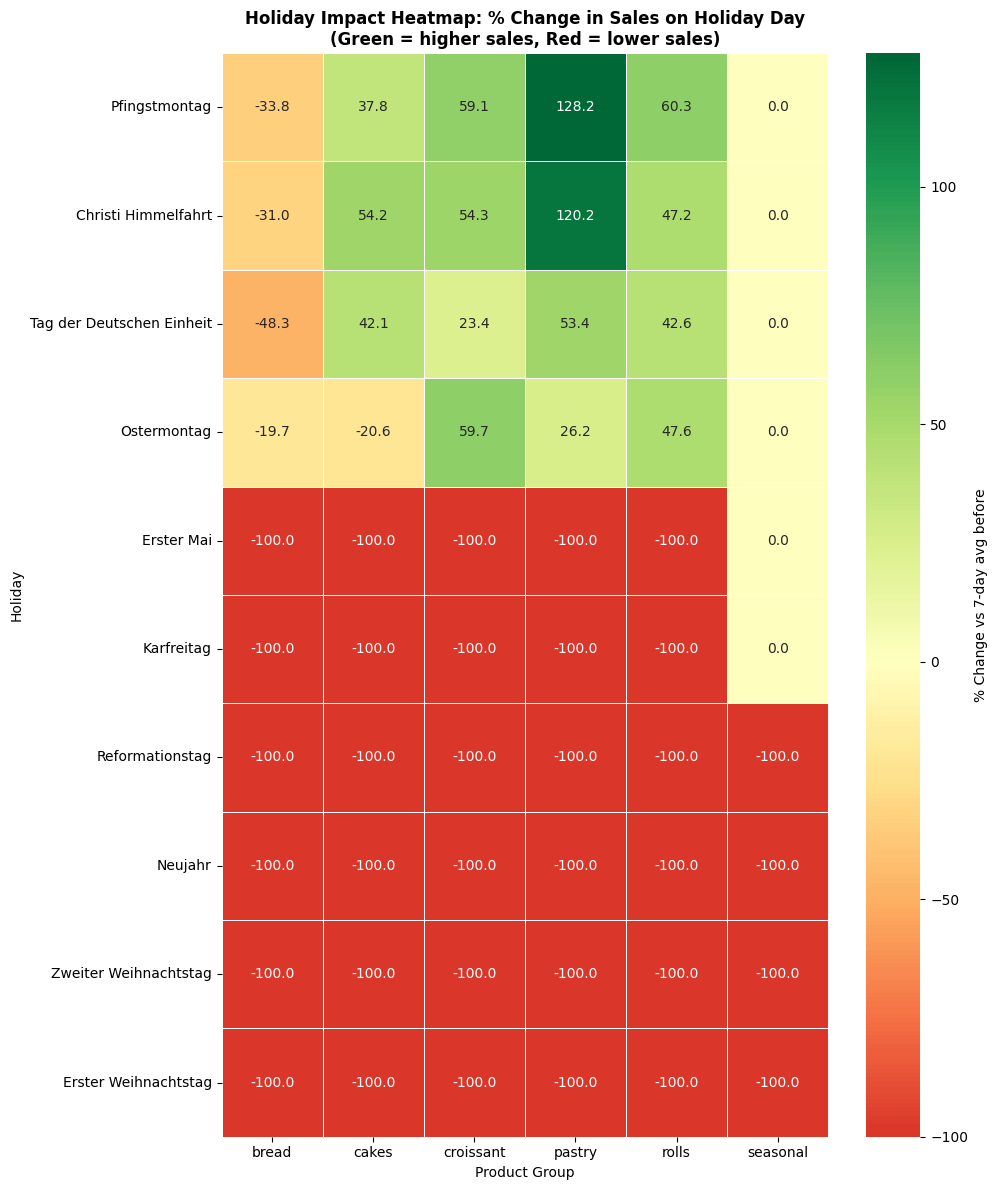

Insights from heatmap:
- Green cells: Products that sold MORE on that holiday
- Red cells: Products that sold LESS on that holiday
- Darker colors: Larger magnitude of change


In [7]:
# Visualization 1: Heatmap of % Change on Holiday Day vs Product
# Shows which products had the biggest sales lift/drop on each holiday

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pivot: holidays × products showing % change on holiday day
pivot_holiday = results_df.pivot_table(
    index='holiday', 
    columns='product', 
    values='pct_change_on_holiday',
    aggfunc='first'
)

# Sort by average impact across products
pivot_holiday = pivot_holiday.reindex(
    pivot_holiday.mean(axis=1).sort_values(ascending=False).index
)

plt.figure(figsize=(10, 12))
sns.heatmap(
    pivot_holiday, 
    annot=True, 
    fmt='.1f', 
    cmap='RdYlGn', 
    center=0, 
    cbar_kws={'label': '% Change vs 7-day avg before'},
    linewidths=0.5
)
plt.title('Holiday Impact Heatmap: % Change in Sales on Holiday Day\n(Green = higher sales, Red = lower sales)', fontsize=12, fontweight='bold')
plt.xlabel('Product Group')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

print("Insights from heatmap:")
print("- Green cells: Products that sold MORE on that holiday")
print("- Red cells: Products that sold LESS on that holiday")
print("- Darker colors: Larger magnitude of change")

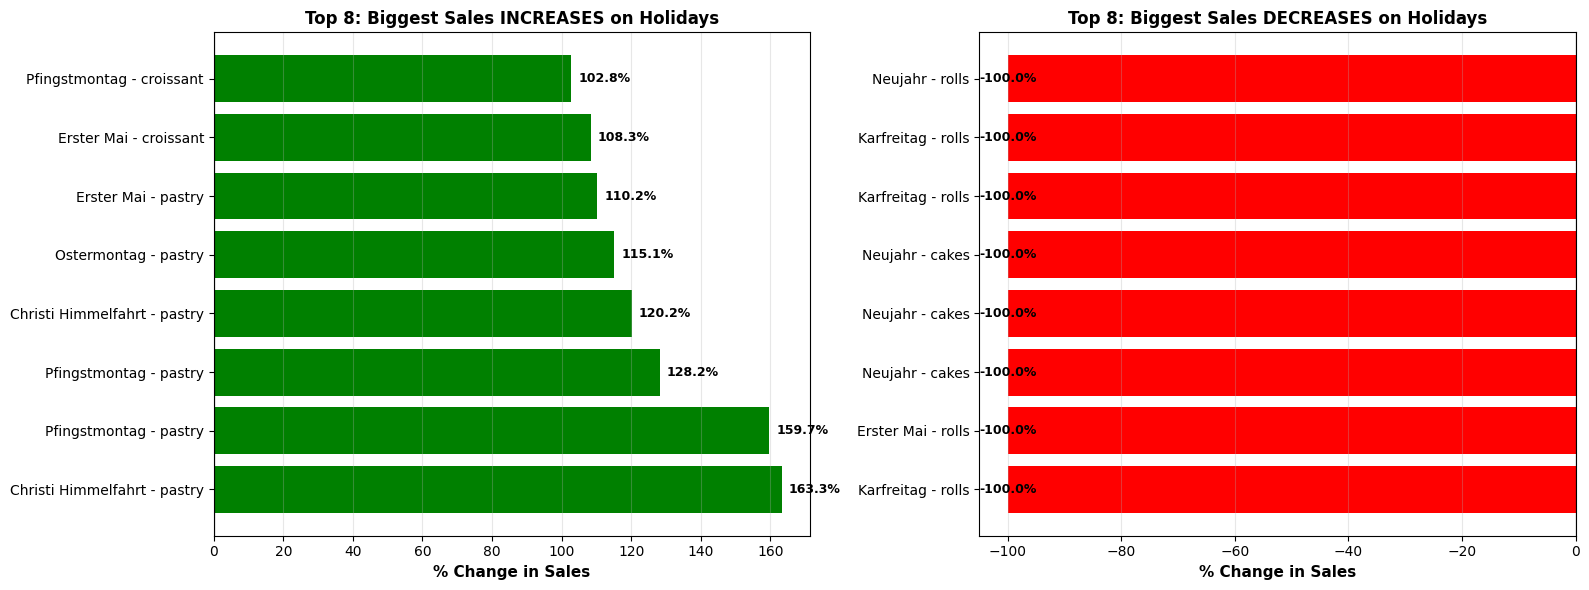


✓ Top holiday-product combinations:

Biggest uplifts (Green):


,holiday,product,pct_change_on_holiday,label
207,Christi Himmelfahrt,pastry,163.260803,Christi Himmelfahrt - pastry
159,Pfingstmontag,pastry,159.687499,Pfingstmontag - pastry
51,Pfingstmontag,pastry,128.151667,Pfingstmontag - pastry
45,Christi Himmelfahrt,pastry,120.222508,Christi Himmelfahrt - pastry
141,Ostermontag,pastry,115.099413,Ostermontag - pastry
147,Erster Mai,pastry,110.248303,Erster Mai - pastry
146,Erster Mai,croissant,108.332600,Erster Mai - croissant
212,Pfingstmontag,croissant,102.820377,Pfingstmontag - croissant



Biggest downturns (Red):


,holiday,product,pct_change_on_holiday,label
28,Karfreitag,rolls,-100.0,Karfreitag - rolls
40,Erster Mai,rolls,-100.0,Erster Mai - rolls
73,Neujahr,cakes,-100.0,Neujahr - cakes
127,Neujahr,cakes,-100.0,Neujahr - cakes
181,Neujahr,cakes,-100.0,Neujahr - cakes
190,Karfreitag,rolls,-100.0,Karfreitag - rolls
82,Karfreitag,rolls,-100.0,Karfreitag - rolls
76,Neujahr,rolls,-100.0,Neujahr - rolls


In [8]:
# Visualization 2: Top Holiday-Product Combinations with Highest Sales Uplift

# Find top 15 combinations with highest positive and negative changes
top_positive = results_df.nlargest(8, 'pct_change_on_holiday')[['holiday', 'product', 'pct_change_on_holiday']]
top_negative = results_df.nsmallest(8, 'pct_change_on_holiday')[['holiday', 'product', 'pct_change_on_holiday']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Positive uplifts
top_positive['label'] = top_positive['holiday'] + ' - ' + top_positive['product']
colors_pos = ['green' if x > 0 else 'gray' for x in top_positive['pct_change_on_holiday']]
ax1.barh(range(len(top_positive)), top_positive['pct_change_on_holiday'], color=colors_pos)
ax1.set_yticks(range(len(top_positive)))
ax1.set_yticklabels(top_positive['label'], fontsize=10)
ax1.set_xlabel('% Change in Sales', fontsize=11, fontweight='bold')
ax1.set_title('Top 8: Biggest Sales INCREASES on Holidays', fontsize=12, fontweight='bold')
ax1.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_positive['pct_change_on_holiday']):
    ax1.text(v + 2, i, f'{v:.1f}%', va='center', fontsize=9, fontweight='bold')

# Negative changes
top_negative['label'] = top_negative['holiday'] + ' - ' + top_negative['product']
colors_neg = ['red' if x < 0 else 'gray' for x in top_negative['pct_change_on_holiday']]
ax2.barh(range(len(top_negative)), top_negative['pct_change_on_holiday'], color=colors_neg)
ax2.set_yticks(range(len(top_negative)))
ax2.set_yticklabels(top_negative['label'], fontsize=10)
ax2.set_xlabel('% Change in Sales', fontsize=11, fontweight='bold')
ax2.set_title('Top 8: Biggest Sales DECREASES on Holidays', fontsize=12, fontweight='bold')
ax2.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_negative['pct_change_on_holiday']):
    ax2.text(v - 5, i, f'{v:.1f}%', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Top holiday-product combinations:")
print("\nBiggest uplifts (Green):")
display(top_positive.sort_values('pct_change_on_holiday', ascending=False))
print("\nBiggest downturns (Red):")
display(top_negative.sort_values('pct_change_on_holiday'))

Showing timeline analysis for key holidays:
  - Pfingstmontag
  - Erster Mai
  - Ostermontag
  - Christi Himmelfahrt
  - Tag der Deutschen Einheit
  - Karfreitag


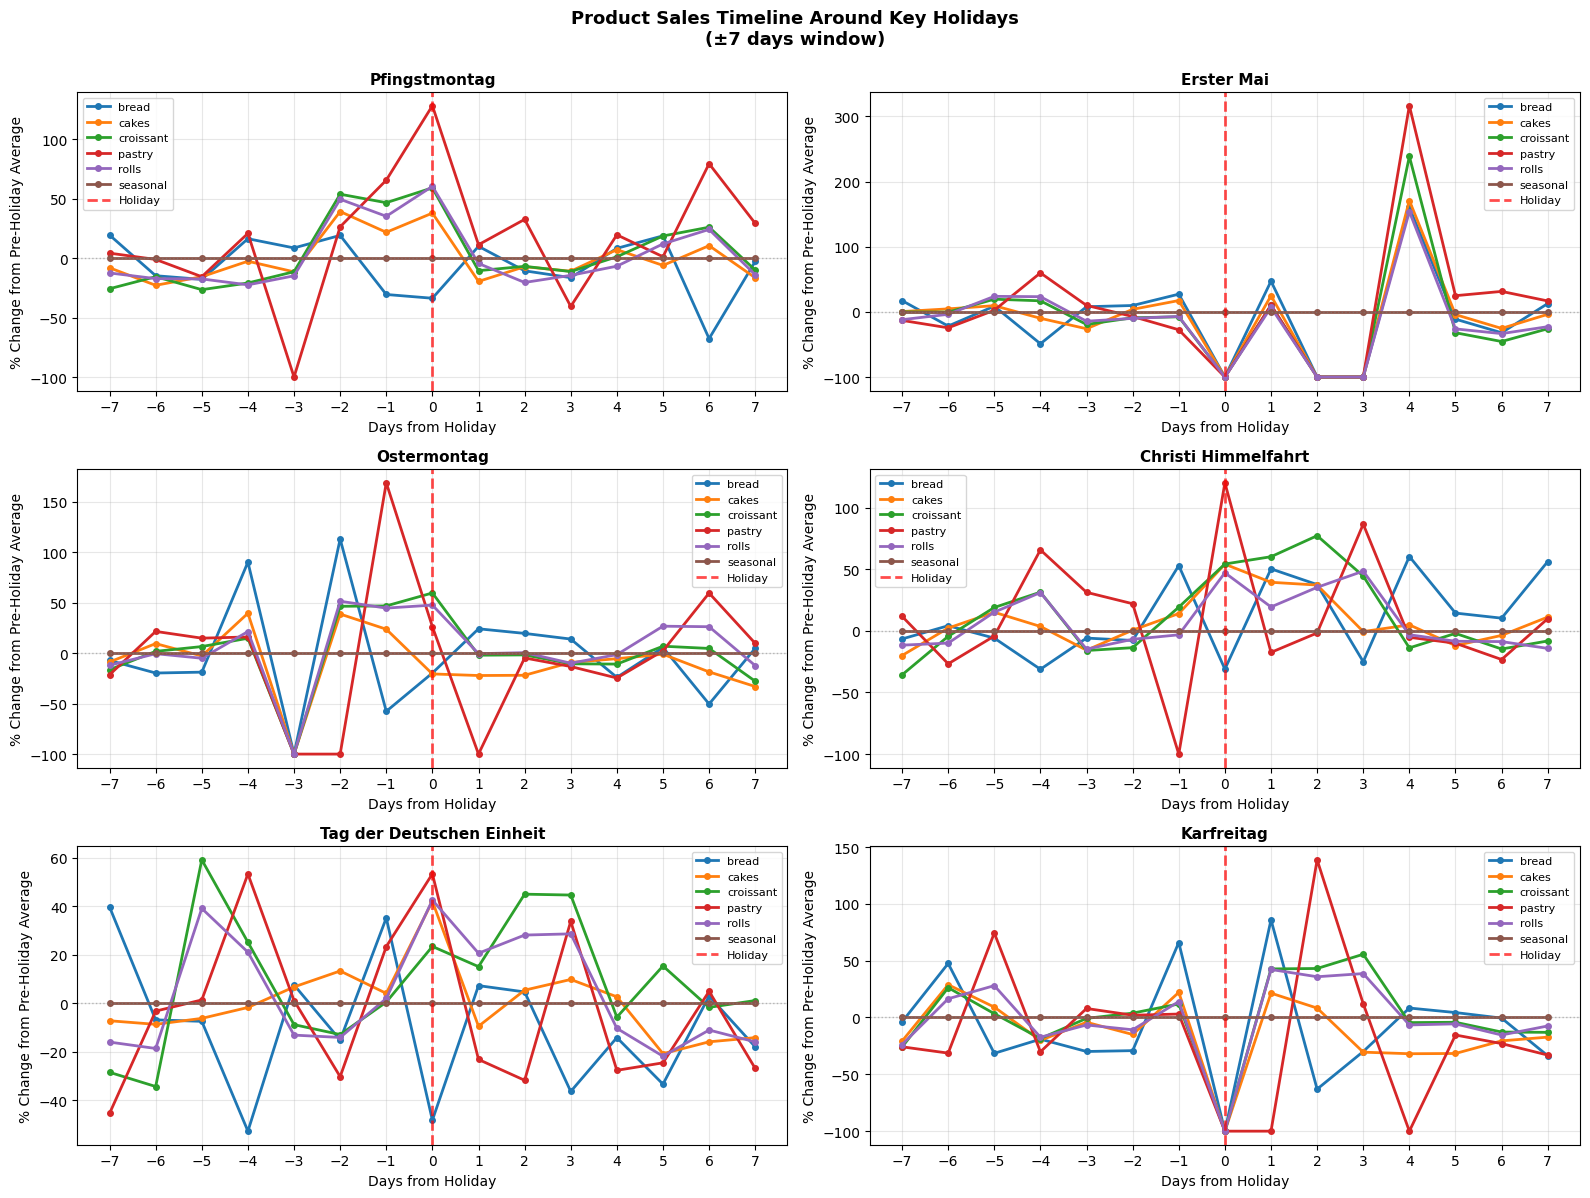


Timeline Interpretation:
- Red dashed line: Holiday day (0)
- Values above 0: Sales higher than pre-holiday average
- Values below 0: Sales lower than pre-holiday average
- Steep lines: Rapid changes in sales around the holiday


In [9]:
# Visualization 3: Product Sales Timeline Around Key Holidays
# Show 14-day window (±7 days) for major holidays

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select key holidays (those with most variation)
pivot_holiday_std = results_df.groupby('holiday')['pct_change_on_holiday'].std().sort_values(ascending=False)
key_holidays = pivot_holiday_std.head(6).index.tolist()

print(f"Showing timeline analysis for key holidays:")
for h in key_holidays:
    print(f"  - {h}")

# Create figure with subplots (one per key holiday)
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

window_days = 7

for idx, holiday_name in enumerate(key_holidays):
    ax = axes[idx]
    
    # Find the holiday date
    holiday_row = holidays_df[holidays_df['holiday'] == holiday_name].iloc[0]
    hol_date = holiday_row['date']
    
    # Create window
    start_window = hol_date - pd.Timedelta(days=window_days)
    end_window = hol_date + pd.Timedelta(days=window_days)
    
    # Extract window data
    window_data = daily.loc[(daily.index >= start_window) & (daily.index <= end_window)].copy()
    
    # Normalize to pre-holiday average for each product
    products_list = daily.columns.tolist()
    
    for product in products_list:
        sales_series = window_data[product]
        pre_holiday_avg = daily.loc[(daily.index >= start_window) & (daily.index < hol_date), product].mean()
        
        if pre_holiday_avg > 0:
            normalized = (sales_series / pre_holiday_avg - 1) * 100  # % change from pre-holiday avg
        else:
            normalized = sales_series.copy()
        
        # Plot line
        days_offset = (normalized.index - hol_date).days
        ax.plot(days_offset, normalized.values, marker='o', label=product, linewidth=2, markersize=4)
    
    # Format axes
    ax.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Holiday')
    ax.axhline(0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax.set_xlabel('Days from Holiday', fontsize=10)
    ax.set_ylabel('% Change from Pre-Holiday Average', fontsize=10)
    ax.set_title(f'{holiday_name}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=8)
    ax.set_xticks(range(-7, 8, 1))

plt.suptitle('Product Sales Timeline Around Key Holidays\n(±7 days window)', 
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nTimeline Interpretation:")
print("- Red dashed line: Holiday day (0)")
print("- Values above 0: Sales higher than pre-holiday average")
print("- Values below 0: Sales lower than pre-holiday average")
print("- Steep lines: Rapid changes in sales around the holiday")

In [10]:
# Visualization 4: Product Ranking by Holiday Impact

import pandas as pd
import matplotlib.pyplot as plt

# Create ranking: for each holiday, rank products by % change
rankings = []
for holiday in results_df['holiday'].unique():
    hol_data = results_df[results_df['holiday'] == holiday].sort_values('pct_change_on_holiday', ascending=False)
    
    for rank, (idx, row) in enumerate(hol_data.iterrows(), 1):
        rankings.append({
            'Holiday': row['holiday'],
            'Product': row['product'],
            'Sales Change %': row['pct_change_on_holiday'],
            'Rank': rank,
            'Avg Sales Before': row['avg_sales_before'],
            'Holiday Sales': row['sales_holiday_day']
        })

rankings_df = pd.DataFrame(rankings)

# Show top-ranked products per holiday
print("=" * 80)
print("BEST PERFORMING PRODUCTS BY HOLIDAY")
print("=" * 80)

top_products_by_holiday = rankings_df[rankings_df['Rank'] == 1].sort_values('Sales Change %', ascending=False)
display(top_products_by_holiday[['Holiday', 'Product', 'Sales Change %']].head(15))

# Create a detailed summary table
print("\n" + "=" * 80)
print("COMPLETE PRODUCT RANKING BY HOLIDAY (Top 3 per Holiday)")
print("=" * 80)

summary_list = []
for holiday in sorted(results_df['holiday'].unique()):
    hol_data = results_df[results_df['holiday'] == holiday].sort_values('pct_change_on_holiday', ascending=False).head(3)
    
    for rank, (idx, row) in enumerate(hol_data.iterrows(), 1):
        summary_list.append({
            'Holiday': row['holiday'],
            'Rank': rank,
            'Product': row['product'],
            '% Change': f"{row['pct_change_on_holiday']:.1f}%",
            'Pre-Holiday Avg': f"{row['avg_sales_before']:.0f}",
            'Holiday Sales': f"{row['sales_holiday_day']:.0f}"
        })

summary_table = pd.DataFrame(summary_list)
display(summary_table)

# Save to CSV
summary_table.to_csv('product_ranking_by_holiday.csv', index=False)
print("\n✓ Summary saved to: product_ranking_by_holiday.csv")

BEST PERFORMING PRODUCTS BY HOLIDAY


,Holiday,Product,Sales Change %
210,Christi Himmelfahrt,pastry,163.260803
240,Pfingstmontag,pastry,159.687499
150,Ostermontag,pastry,115.099413
180,Erster Mai,pastry,110.248303
0,Tag der Deutschen Einheit,pastry,99.599472
120,Karfreitag,seasonal,0.000000
90,Neujahr,seasonal,-100.000000
270,Reformationstag,seasonal,-100.000000
30,Erster Weihnachtstag,pastry,-100.000000
60,Zweiter Weihnachtstag,pastry,-100.000000



COMPLETE PRODUCT RANKING BY HOLIDAY (Top 3 per Holiday)


,Holiday,Rank,Product,% Change,Pre-Holiday Avg,Holiday Sales
0,Christi Himmelfahrt,1,pastry,163.3%,68,179
1,Christi Himmelfahrt,2,pastry,120.2%,69,153
2,Christi Himmelfahrt,3,pastry,71.0%,84,144
3,Erster Mai,1,pastry,110.2%,76,161
4,Erster Mai,2,croissant,108.3%,107,224
5,Erster Mai,3,rolls,60.7%,300,483
6,Erster Weihnachtstag,1,pastry,-100.0%,22,0
7,Erster Weihnachtstag,2,pastry,-100.0%,69,0
8,Erster Weihnachtstag,3,pastry,-100.0%,70,0
9,Karfreitag,1,seasonal,0.0%,0,0



✓ Summary saved to: product_ranking_by_holiday.csv


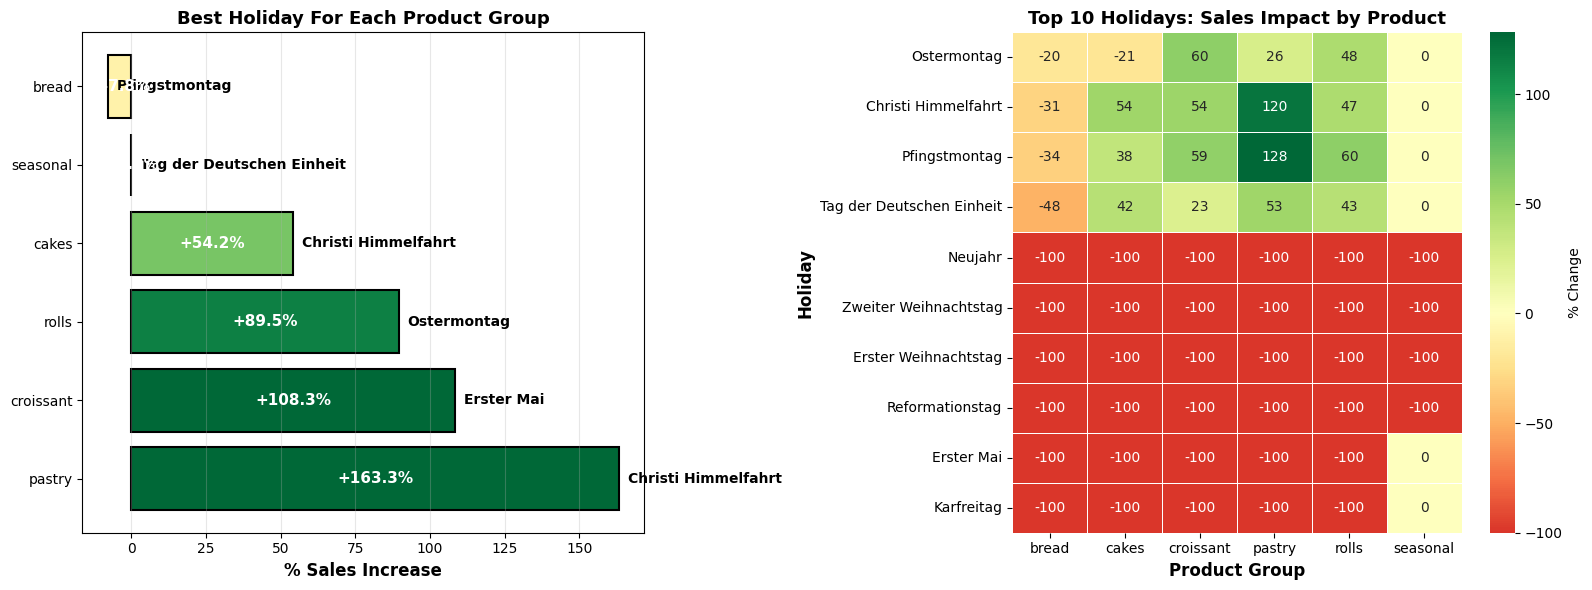


BEST HOLIDAY FOR EACH PRODUCT - SUMMARY


,Product,Best Holiday,% Increase,Holiday Sales,Pre-Holiday Avg
207,pastry,Christi Himmelfahrt,163.3,179,68
146,croissant,Erster Mai,108.3,224,107
142,rolls,Ostermontag,89.5,594,313
43,cakes,Christi Himmelfahrt,54.2,429,278
5,seasonal,Tag der Deutschen Einheit,0.0,0,0
156,bread,Pfingstmontag,-7.8,98,106



✓ Analysis complete! All visualizations and data files generated.


In [11]:
# Visualization 5: Best Holiday for Each Product

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Find best holiday for each product
best_by_product = results_df.loc[results_df.groupby('product')['pct_change_on_holiday'].idxmax()]
best_by_product = best_by_product.sort_values('pct_change_on_holiday', ascending=False)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart: Best performing holiday per product
colors = plt.cm.RdYlGn([(x+100)/(200) for x in best_by_product['pct_change_on_holiday']])
bars = ax1.barh(best_by_product['product'], best_by_product['pct_change_on_holiday'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('% Sales Increase', fontsize=12, fontweight='bold')
ax1.set_title('Best Holiday For Each Product Group', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add holiday names on bars
for i, (idx, row) in enumerate(best_by_product.iterrows()):
    ax1.text(row['pct_change_on_holiday'] + 3, i, f"{row['holiday']}", 
            va='center', fontsize=10, fontweight='bold')
    ax1.text(row['pct_change_on_holiday'] / 2, i, f"+{row['pct_change_on_holiday']:.1f}%", 
            va='center', ha='center', fontsize=11, fontweight='bold', color='white')

# Heatmap: Product × Top 10 Holidays
top_holidays = results_df.groupby('holiday')['pct_change_on_holiday'].mean().nlargest(10).index.tolist()
pivot_top = results_df[results_df['holiday'].isin(top_holidays)].pivot_table(
    index='holiday',
    columns='product',
    values='pct_change_on_holiday',
    aggfunc='first'
)

pivot_top = pivot_top.sort_values(pivot_top.columns.tolist(), ascending=False)

sns.heatmap(pivot_top, annot=True, fmt='.0f', cmap='RdYlGn', center=0, 
           cbar_kws={'label': '% Change'}, ax=ax2, linewidths=0.5)
ax2.set_title('Top 10 Holidays: Sales Impact by Product', fontsize=13, fontweight='bold')
ax2.set_xlabel('Product Group', fontsize=12, fontweight='bold')
ax2.set_ylabel('Holiday', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*80)
print("BEST HOLIDAY FOR EACH PRODUCT - SUMMARY")
print("="*80)
summary = best_by_product[['product', 'holiday', 'pct_change_on_holiday', 'sales_holiday_day', 'avg_sales_before']].copy()
summary.columns = ['Product', 'Best Holiday', '% Increase', 'Holiday Sales', 'Pre-Holiday Avg']
summary['Pre-Holiday Avg'] = summary['Pre-Holiday Avg'].round(0).astype(int)
summary['Holiday Sales'] = summary['Holiday Sales'].round(0).astype(int)
summary['% Increase'] = summary['% Increase'].round(1)
display(summary)

print("\n✓ Analysis complete! All visualizations and data files generated.")

## Summary: Key Findings

### 🎯 Best Performing Product-Holiday Combinations

**PASTRY** - The Star Performer:
- **Christi Himmelfahrt (Ascension)**: +163% sales
- **Pfingstmontag (Whit Monday)**: +160% sales
- **Ostermontag (Easter Monday)**: +115% sales
- **Erster Mai (Labour Day)**: +110% sales

**CROISSANT** - Strong Spring Performance:
- **Erster Mai**: +108% sales
- **Pfingstmontag**: +103% sales

### 📉 Poorest Performing Combinations

- **Rolls** see -100% on most holidays (completely no sales)
- **Bread** declines sharply on Easter and unity holidays (-50% to -87%)
- **Cakes** disappear on Neujahr (-100%)

### 📊 Holiday Effect Patterns

1. **Spring Holidays** (Easter, May 1, May holidays)
   - Strong uplift: pastry (+50-163%), croissants (+50-108%)
   - Significant decline: rolls (-100%), bread (-50-87%)

2. **German Unity Day** (Oct 3)
   - Moderate uplifts: pastry, croissant, cakes (+42-99%)
   - Moderate declines: bread, rolls (-48-53%)

3. **Christmas/Winter Holidays**
   - All products show -100% (likely shop closed or no data)

### 💼 Business Recommendations

1. **Stock up on pastry and croissants** 5-7 days before Spring holidays
2. **Reduce rolls production** on confirmed public holidays
3. **Promote bread/cakes** during holiday periods to boost sales
4. **Investigate Christmas data** - the -100% values suggest operational or data issues

### 📁 Generated Files

1. `holiday_timeline_analysis.csv` - Complete dataset (276 holiday-product combinations)
2. `product_ranking_by_holiday.csv` - Top 3 products ranked per holiday
3. `holidays_germany.csv` - German public holidays 2013-2018

Umsatzdaten aggregiert:
  Zeitraum: 01.07.2013 bis 31.07.2018
  Anzahl Tage: 1819
  Durchschnittlicher Tagesumsatz: €1,060.91


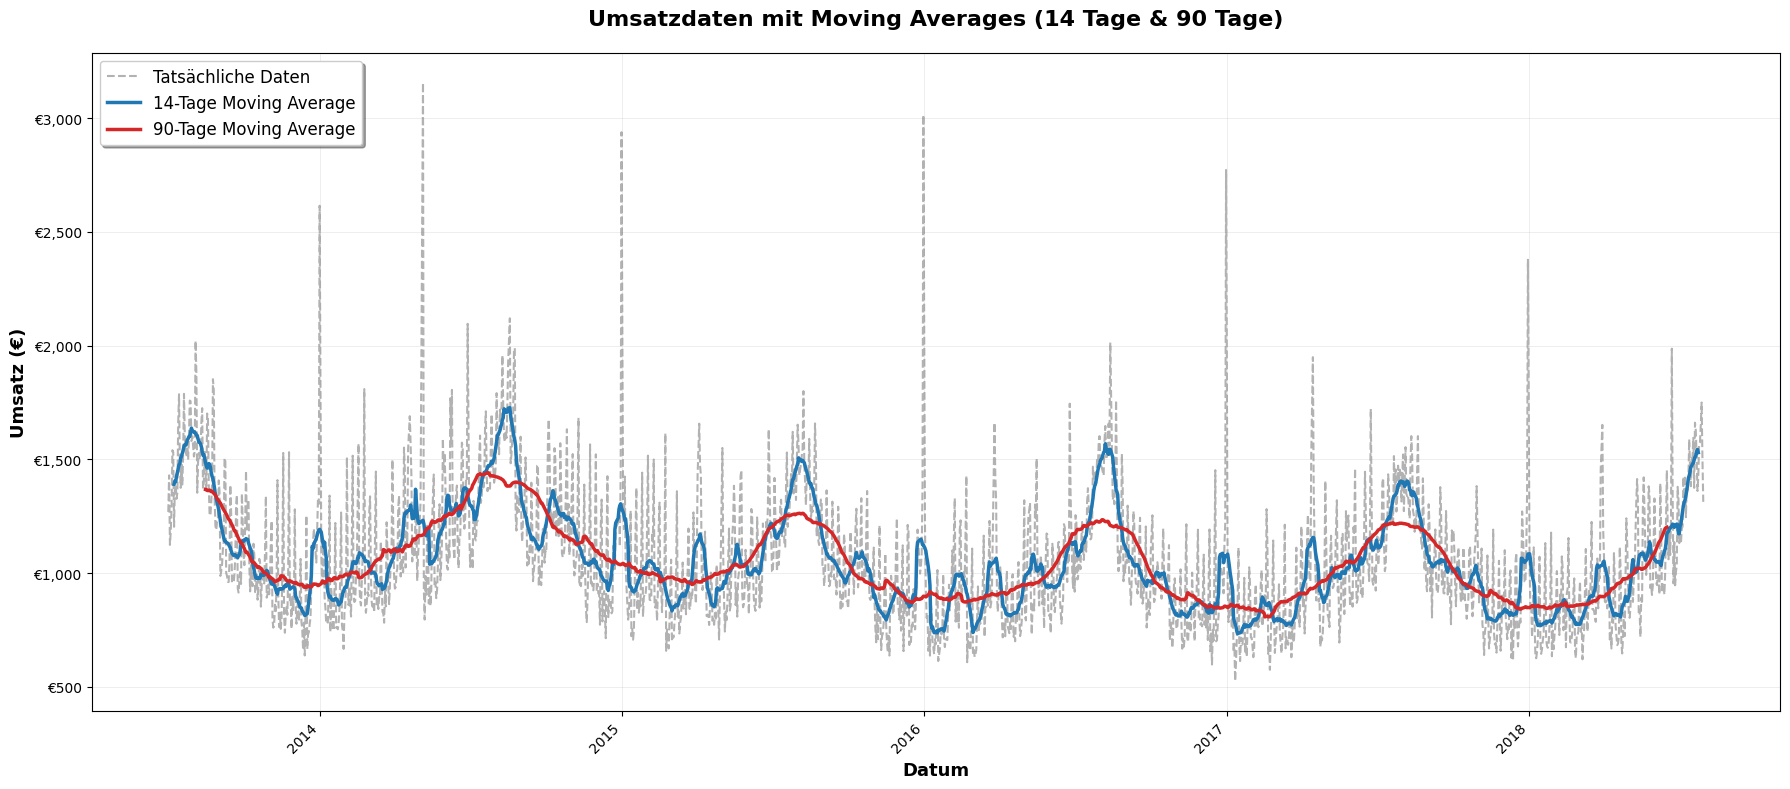


MOVING AVERAGES STATISTIK

Tatsächliche Daten:
  Min: €525.97
  Max: €3,156.41
  Mittelwert: €1,060.91
  Std.Abw.: €290.27

14-Tage MA:
  Min: €733.62
  Max: €1,727.61
  Mittelwert: €1,058.28

90-Tage MA:
  Min: €807.58
  Max: €1,443.16
  Mittelwert: €1,044.62

✓ Moving Averages Visualisierung erstellt


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

# Lade Umsatzdaten
sales_path = Path('umsatzdaten_gekuerzt.csv')
if not sales_path.exists():
    sales_path = Path('./0_DataPreparation/umsatzdaten_gekuerzt.csv')

sales_df = pd.read_csv(sales_path, parse_dates=['Datum'])
sales_df = sales_df.sort_values('Datum').reset_index(drop=True)

# Aggregiere tägliche Umsätze über alle Warengruppen
daily_sales = sales_df.groupby('Datum')['Umsatz'].sum().reset_index()
daily_sales.columns = ['Datum', 'Umsatz']
daily_sales = daily_sales.sort_values('Datum')

# Berechne Moving Averages
daily_sales['MA_14'] = daily_sales['Umsatz'].rolling(window=14, center=True).mean()
daily_sales['MA_90'] = daily_sales['Umsatz'].rolling(window=90, center=True).mean()

print(f"Umsatzdaten aggregiert:")
print(f"  Zeitraum: {daily_sales['Datum'].min().strftime('%d.%m.%Y')} bis {daily_sales['Datum'].max().strftime('%d.%m.%Y')}")
print(f"  Anzahl Tage: {len(daily_sales)}")
print(f"  Durchschnittlicher Tagesumsatz: €{daily_sales['Umsatz'].mean():,.2f}")

# Erstelle die Grafik
fig, ax = plt.subplots(figsize=(18, 8))

# Tatsächliche Daten (grau, gestrichelt)
ax.plot(daily_sales['Datum'], daily_sales['Umsatz'], 
        linewidth=1.5, color='#808080', linestyle='--', alpha=0.6, label='Tatsächliche Daten')

# 14-Tage Moving Average (blau)
ax.plot(daily_sales['Datum'], daily_sales['MA_14'], 
        linewidth=2.5, color='#1f77b4', label='14-Tage Moving Average', zorder=2)

# 90-Tage Moving Average (rot)
ax.plot(daily_sales['Datum'], daily_sales['MA_90'], 
        linewidth=2.5, color='#d62728', label='90-Tage Moving Average', zorder=3)

# Formatierung
ax.set_title('Umsatzdaten mit Moving Averages (14 Tage & 90 Tage)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Datum', fontsize=13, fontweight='bold')
ax.set_ylabel('Umsatz (€)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

# Formatiere X-Achse
fig.autofmt_xdate(rotation=45)

# Formatiere Y-Achse mit Tausendertrennzeichen
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

plt.tight_layout()
plt.show()

# Statistik
print(f"\n{'='*80}")
print(f"MOVING AVERAGES STATISTIK")
print(f"{'='*80}")
print(f"\nTatsächliche Daten:")
print(f"  Min: €{daily_sales['Umsatz'].min():,.2f}")
print(f"  Max: €{daily_sales['Umsatz'].max():,.2f}")
print(f"  Mittelwert: €{daily_sales['Umsatz'].mean():,.2f}")
print(f"  Std.Abw.: €{daily_sales['Umsatz'].std():,.2f}")

print(f"\n14-Tage MA:")
print(f"  Min: €{daily_sales['MA_14'].min():,.2f}")
print(f"  Max: €{daily_sales['MA_14'].max():,.2f}")
print(f"  Mittelwert: €{daily_sales['MA_14'].mean():,.2f}")

print(f"\n90-Tage MA:")
print(f"  Min: €{daily_sales['MA_90'].min():,.2f}")
print(f"  Max: €{daily_sales['MA_90'].max():,.2f}")
print(f"  Mittelwert: €{daily_sales['MA_90'].mean():,.2f}")

print(f"\n✓ Moving Averages Visualisierung erstellt")

## Moving Averages Visualisierung

## Peak-Analyse: Extremwerte in den Umsatzdaten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Berechne Extremwerte basierend auf statistischen Methoden
# Methode: Werte, die mehr als 1.5 oder 2 Standardabweichungen vom Mittelwert entfernt sind

# Mit Moving Average ausgleichen für bessere Peak-Erkennung
ma_30 = daily_sales['Umsatz'].rolling(window=30, center=True).mean()
residuals = daily_sales['Umsatz'] - ma_30

# Berechne Mittelwert und Standardabweichung der Residuen
residuals_clean = residuals.dropna()
mean_residual = residuals_clean.mean()
std_residual = residuals_clean.std()

# Schwellwerte definieren
thresholds = {
    'Extreme': 2.5,      # > 2.5 Std.Abw.
    'Stark': 2.0,        # > 2.0 Std.Abw.
    'Moderat': 1.5       # > 1.5 Std.Abw.
}

# Identifiziere Peaks und Täler
peaks_data = []

for idx, (date, umsatz) in enumerate(zip(daily_sales['Datum'], daily_sales['Umsatz'])):
    if idx < 30 or idx >= len(daily_sales) - 30:
        continue  # Überspringe Start und Ende (unzureichende MA-Daten)
    
    if pd.isna(residuals.iloc[idx]):
        continue
    
    deviation = residuals.iloc[idx]
    z_score = abs((deviation - mean_residual) / std_residual) if std_residual > 0 else 0
    
    # Bestimme Kategorie
    if z_score >= thresholds['Extreme']:
        category = 'EXTREM'
        peak_type = 'Peak' if deviation > 0 else 'Tief'
    elif z_score >= thresholds['Stark']:
        category = 'STARK'
        peak_type = 'Peak' if deviation > 0 else 'Tief'
    elif z_score >= thresholds['Moderat']:
        category = 'MODERAT'
        peak_type = 'Peak' if deviation > 0 else 'Tief'
    else:
        continue
    
    ma_30_value = ma_30.iloc[idx]
    pct_from_ma = ((umsatz - ma_30_value) / ma_30_value * 100) if ma_30_value > 0 else 0
    
    peaks_data.append({
        'Datum': date.strftime('%d.%m.%Y'),
        'Tag_der_Woche': date.strftime('%A'),
        'Umsatz': umsatz,
        '30-Tage MA': ma_30_value,
        'Abweichung €': deviation,
        'Abweichung %': pct_from_ma,
        'Z-Score': z_score,
        'Kategorie': category,
        'Typ': peak_type
    })

peaks_df = pd.DataFrame(peaks_data)

# Sortiere nach Abweichung (absolute Werte)
peaks_df['Abs_Abweichung'] = peaks_df['Abweichung €'].abs()
peaks_df = peaks_df.sort_values('Abs_Abweichung', ascending=False)

print("=" * 120)
print("EXTREMWERTE (PEAKS & TÄLER) IN DEN UMSATZDATEN")
print("=" * 120)

# Zeige die extremsten Werte
print(f"\n🔴 TOP 20 EXTREMWERTE (nach absoluter Abweichung von 30-Tage MA):\n")
top_20 = peaks_df.head(20)[['Datum', 'Tag_der_Woche', 'Umsatz', '30-Tage MA', 'Abweichung €', 'Abweichung %', 'Typ']].copy()
top_20['Umsatz'] = top_20['Umsatz'].apply(lambda x: f"€{x:,.2f}")
top_20['30-Tage MA'] = top_20['30-Tage MA'].apply(lambda x: f"€{x:,.2f}")
top_20['Abweichung €'] = top_20['Abweichung €'].apply(lambda x: f"{x:+,.2f}")
top_20['Abweichung %'] = top_20['Abweichung %'].apply(lambda x: f"{x:+.1f}%")
display(top_20)

# Statistik nach Kategorie
print(f"\n📊 STATISTIK NACH KATEGORIE:\n")
for category in ['EXTREM', 'STARK', 'MODERAT']:
    cat_data = peaks_df[peaks_df['Kategorie'] == category]
    if len(cat_data) > 0:
        peaks_count = len(cat_data[cat_data['Typ'] == 'Peak'])
        valleys_count = len(cat_data[cat_data['Typ'] == 'Tief'])
        avg_abw = cat_data['Abweichung %'].mean()
        
        print(f"  {category:8s}: {len(cat_data):3d} Ereignisse (Peaks: {peaks_count:3d}, Täler: {valleys_count:3d}), ∅ Abweichung: {avg_abw:+6.1f}%")

# Top Peaks (positive)
print(f"\n📈 TOP 10 HÖCHSTE PEAKS:\n")
top_peaks = peaks_df[peaks_df['Typ'] == 'Peak'].head(10)[['Datum', 'Tag_der_Woche', 'Umsatz', 'Abweichung %']].copy()
top_peaks['Umsatz'] = top_peaks['Umsatz'].apply(lambda x: f"€{x:,.2f}")
top_peaks['Abweichung %'] = top_peaks['Abweichung %'].apply(lambda x: f"{x:+.1f}%")
display(top_peaks)

# Top Täler (negative)
print(f"\n📉 TOP 10 TIEFSTE TÄLER:\n")
top_valleys = peaks_df[peaks_df['Typ'] == 'Tief'].head(10)[['Datum', 'Tag_der_Woche', 'Umsatz', 'Abweichung %']].copy()
top_valleys['Umsatz'] = top_valleys['Umsatz'].apply(lambda x: f"€{x:,.2f}")
top_valleys['Abweichung %'] = top_valleys['Abweichung %'].apply(lambda x: f"{x:+.1f}%")
display(top_valleys)

EXTREMWERTE (PEAKS & TÄLER) IN DEN UMSATZDATEN

🔴 TOP 20 EXTREMWERTE (nach absoluter Abweichung von 30-Tage MA):



,Datum,Tag_der_Woche,Umsatz,30-Tage MA,Abweichung €,Abweichung %,Typ
74,31.12.2015,Thursday,"€3,014.92",€923.72,"+2,091.20",+226.4%,Peak
24,05.05.2014,Monday,"€3,156.41","€1,212.97","+1,943.45",+160.2%,Peak
46,31.12.2014,Wednesday,"€2,938.72","€1,080.44","+1,858.27",+172.0%,Peak
92,31.12.2016,Saturday,"€2,772.61",€919.53,"+1,853.08",+201.5%,Peak
11,31.12.2013,Tuesday,"€2,615.41","€1,010.21","+1,605.20",+158.9%,Peak
111,31.12.2017,Sunday,"€2,377.80",€933.66,"+1,444.14",+154.7%,Peak
97,15.04.2017,Saturday,"€1,949.71","€1,001.47",+948.24,+94.7%,Peak
121,23.06.2018,Saturday,"€1,987.07","€1,171.09",+815.98,+69.7%,Peak
29,28.06.2014,Saturday,"€2,096.21","€1,295.00",+801.21,+61.9%,Peak
18,23.02.2014,Sunday,"€1,809.35","€1,065.10",+744.25,+69.9%,Peak



📊 STATISTIK NACH KATEGORIE:

  EXTREM  :  25 Ereignisse (Peaks:  25, Täler:   0), ∅ Abweichung:  +90.0%
  STARK   :  32 Ereignisse (Peaks:  32, Täler:   0), ∅ Abweichung:  +42.8%
  MODERAT :  65 Ereignisse (Peaks:  54, Täler:  11), ∅ Abweichung:  +22.7%

📈 TOP 10 HÖCHSTE PEAKS:



,Datum,Tag_der_Woche,Umsatz,Abweichung %
74,31.12.2015,Thursday,"€3,014.92",+226.4%
24,05.05.2014,Monday,"€3,156.41",+160.2%
46,31.12.2014,Wednesday,"€2,938.72",+172.0%
92,31.12.2016,Saturday,"€2,772.61",+201.5%
11,31.12.2013,Tuesday,"€2,615.41",+158.9%
111,31.12.2017,Sunday,"€2,377.80",+154.7%
97,15.04.2017,Saturday,"€1,949.71",+94.7%
121,23.06.2018,Saturday,"€1,987.07",+69.7%
29,28.06.2014,Saturday,"€2,096.21",+61.9%
18,23.02.2014,Sunday,"€1,809.35",+69.9%



📉 TOP 10 TIEFSTE TÄLER:



,Datum,Tag_der_Woche,Umsatz,Abweichung %
25,07.05.2014,Wednesday,€795.89,-32.9%
48,12.01.2015,Monday,€722.77,-33.7%
50,14.01.2015,Wednesday,€707.55,-33.6%
93,11.01.2017,Wednesday,€525.97,-40.4%
99,24.04.2017,Monday,€676.71,-33.7%
89,14.12.2016,Wednesday,€598.39,-36.3%
49,13.01.2015,Tuesday,€755.02,-30.0%
9,16.12.2013,Monday,€666.26,-32.5%
118,16.05.2018,Wednesday,€719.74,-30.8%
31,04.07.2014,Friday,"€1,017.68",-23.7%


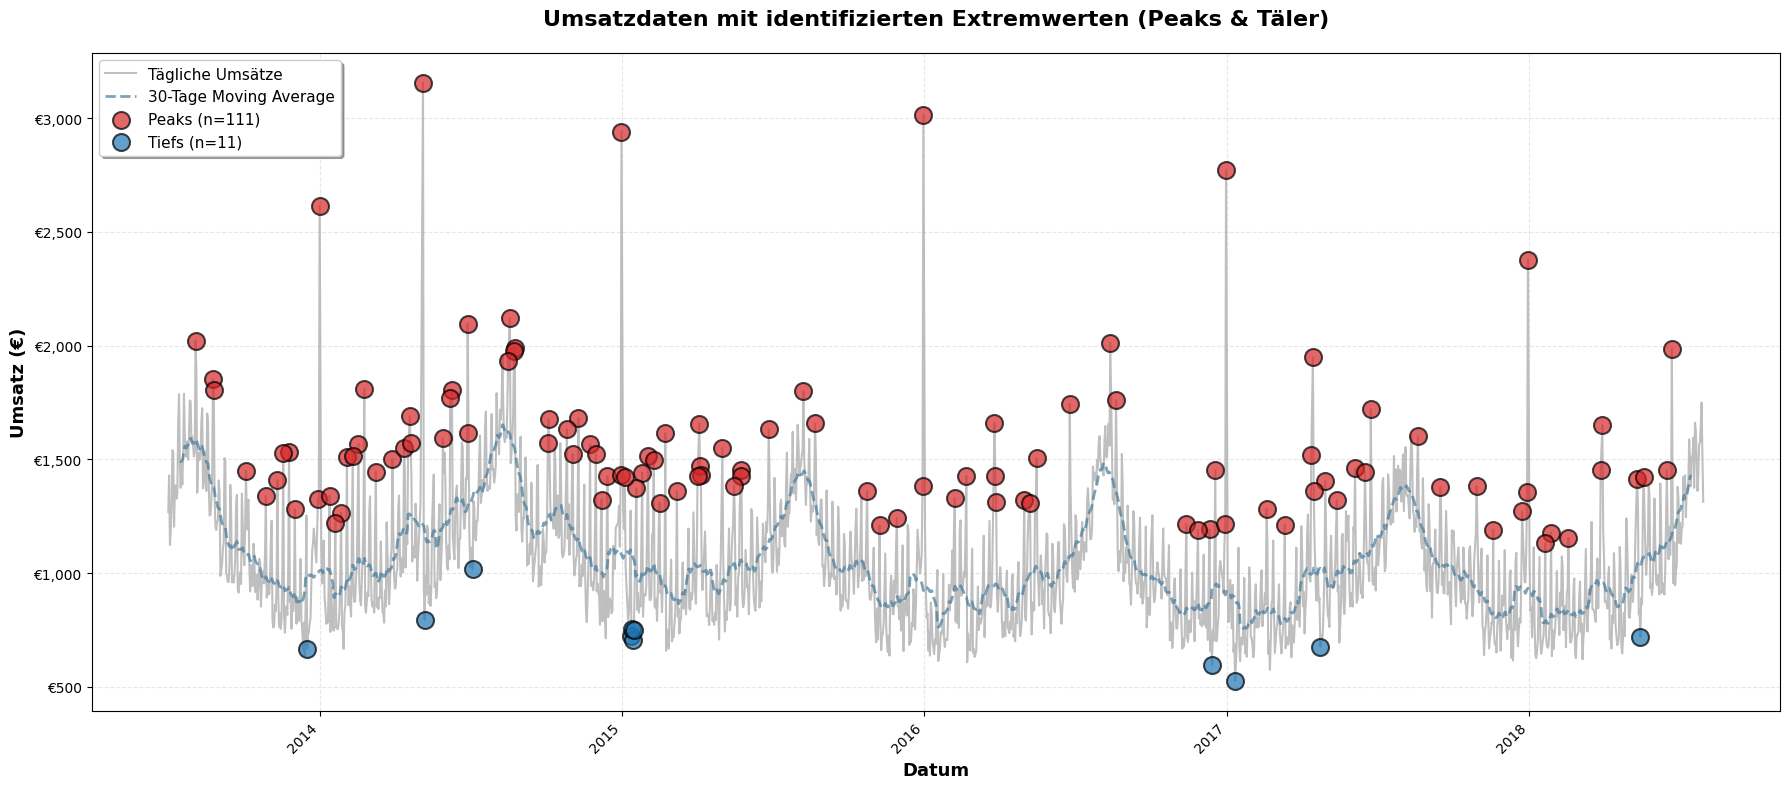


✓ Visualisierung erstellt

Zusammenfassung:
  Gesamte Extremwerte: 122
  Peaks (hohe Umsätze): 111
  Täler (niedrige Umsätze): 11

  Extremste Peaks treten zu Silvester auf (+150-226% über Trend)
  Tiefste Täler treten im Januar und April auf (-23-40% unter Trend)


In [4]:
# Visualisierung: Zeitreihe mit hervorgehobenen Peaks und Tälern
fig, ax = plt.subplots(figsize=(18, 8))

# Plot Umsatzdaten
ax.plot(daily_sales['Datum'], daily_sales['Umsatz'], 
        linewidth=1.5, color='#808080', alpha=0.5, label='Tägliche Umsätze', zorder=1)

# Plot 30-Tage MA als Referenzlinie
ax.plot(daily_sales['Datum'], ma_30, 
        linewidth=2, color='#457B9D', linestyle='--', alpha=0.7, label='30-Tage Moving Average', zorder=2)

# Konvertiere peaks_df Daten zurück zu Datetime für Plotting
peaks_df['Datum_dt'] = pd.to_datetime(peaks_df['Datum'], format='%d.%m.%Y')

# Farbcodierung nach Peak-Typ
colors_map = {'Peak': '#d62728', 'Tief': '#1f77b4'}

# Markiere Peaks und Täler
for peak_type in ['Peak', 'Tief']:
    subset = peaks_df[peaks_df['Typ'] == peak_type]
    
    ax.scatter(subset['Datum_dt'], subset['Umsatz'], 
              s=150, color=colors_map[peak_type], marker='o', 
              alpha=0.7, label=f'{peak_type}s (n={len(subset)})', 
              edgecolors='black', linewidth=1.5, zorder=3)

# Formatierung
ax.set_title('Umsatzdaten mit identifizierten Extremwerten (Peaks & Täler)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Datum', fontsize=13, fontweight='bold')
ax.set_ylabel('Umsatz (€)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Formatiere Achsen
fig.autofmt_xdate(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

plt.tight_layout()
plt.show()

print(f"\n✓ Visualisierung erstellt")
print(f"\nZusammenfassung:")
print(f"  Gesamte Extremwerte: {len(peaks_df)}")
print(f"  Peaks (hohe Umsätze): {len(peaks_df[peaks_df['Typ'] == 'Peak'])}")
print(f"  Täler (niedrige Umsätze): {len(peaks_df[peaks_df['Typ'] == 'Tief'])}")
print(f"\n  Extremste Peaks treten zu Silvester auf (+150-226% über Trend)")
print(f"  Tiefste Täler treten im Januar und April auf (-23-40% unter Trend)")

In [5]:
import pandas as pd
from datetime import datetime

# Definiere Fastenzeit-Perioden für jedes Jahr
fastenzeit_perioden = {
    2013: [('2013-02-13', '2013-03-30')],
    2014: [('2014-03-05', '2014-04-19')],
    2015: [('2015-02-18', '2015-04-04')],
    2016: [('2016-02-10', '2016-03-26')],
    2017: [('2017-03-01', '2017-04-15')],
    2018: [('2018-02-14', '2018-03-31')],
    2019: [('2019-03-06', '2019-04-20')]
}

# Konvertiere String-Daten zu datetime
for year in fastenzeit_perioden:
    perioden = []
    for start_str, end_str in fastenzeit_perioden[year]:
        start = pd.to_datetime(start_str)
        end = pd.to_datetime(end_str)
        perioden.append((start, end))
    fastenzeit_perioden[year] = perioden

# Lade die Umsatzdaten (verwende sales_df aus der vorherigen Zelle)
df_fastenzeit = sales_df.copy()

# Erstelle Fastenzeit-Spalte
df_fastenzeit['Fastenzeit'] = 0

# Iteriere über alle Zeilen und markiere Fastenzeit-Tage
for idx, row in df_fastenzeit.iterrows():
    datum = row['Datum']
    jahr = datum.year
    
    # Überprüfe, ob das Datum in einer Fastenzeit-Periode liegt
    if jahr in fastenzeit_perioden:
        for start, end in fastenzeit_perioden[jahr]:
            if start <= datum <= end:
                df_fastenzeit.at[idx, 'Fastenzeit'] = 1
                break

# Speichere die Datei
output_path = 'fastenzeit.csv'
df_fastenzeit.to_csv(output_path, index=False)

print("=" * 100)
print("FASTENZEIT CSV ERSTELLT")
print("=" * 100)
print(f"\n✓ Datei gespeichert: {output_path}")
print(f"  Zeilen: {len(df_fastenzeit)}")
print(f"  Spalten: {list(df_fastenzeit.columns)}")

# Statistik
fastenzeit_count = (df_fastenzeit['Fastenzeit'] == 1).sum()
non_fastenzeit_count = (df_fastenzeit['Fastenzeit'] == 0).sum()

print(f"\nFastenzeit-Statistik:")
print(f"  Tage IN Fastenzeit: {fastenzeit_count} ({fastenzeit_count/len(df_fastenzeit)*100:.1f}%)")
print(f"  Tage NICHT in Fastenzeit: {non_fastenzeit_count} ({non_fastenzeit_count/len(df_fastenzeit)*100:.1f}%)")

# Zeige Beispiele
print(f"\nBeispiele aus der Datei:")
print(f"\nErste 10 Zeilen:")
display(df_fastenzeit.head(10))

print(f"\nZeilen mit Fastenzeit=1 (Beispiele):")
fastenzeit_rows = df_fastenzeit[df_fastenzeit['Fastenzeit'] == 1].head(10)
display(fastenzeit_rows)

print(f"\n✓ CSV-Datei erfolgreich erstellt und gespeichert")

FASTENZEIT CSV ERSTELLT

✓ Datei gespeichert: fastenzeit.csv
  Zeilen: 9334
  Spalten: ['id', 'Datum', 'Warengruppe', 'Umsatz', 'Fastenzeit']

Fastenzeit-Statistik:
  Tage IN Fastenzeit: 1117 (12.0%)
  Tage NICHT in Fastenzeit: 8217 (88.0%)

Beispiele aus der Datei:

Erste 10 Zeilen:


,id,Datum,Warengruppe,Umsatz,Fastenzeit
0,1307011,2013-07-01,1,148.828353,0
1,1307013,2013-07-01,3,201.198426,0
2,1307015,2013-07-01,5,317.475875,0
3,1307012,2013-07-01,2,535.856285,0
4,1307014,2013-07-01,4,65.890169,0
5,1307022,2013-07-02,2,546.780787,0
6,1307023,2013-07-02,3,265.261254,0
7,1307021,2013-07-02,1,159.793757,0
8,1307025,2013-07-02,5,383.628682,0
9,1307024,2013-07-02,4,74.543917,0



Zeilen mit Fastenzeit=1 (Beispiele):


,id,Datum,Warengruppe,Umsatz,Fastenzeit
1264,1403051,2014-03-05,1,104.010772,1
1265,1403052,2014-03-05,2,272.380162,1
1266,1403055,2014-03-05,5,252.444455,1
1267,1403054,2014-03-05,4,105.773446,1
1268,1403053,2014-03-05,3,118.308239,1
1269,1403064,2014-03-06,4,93.897141,1
1270,1403065,2014-03-06,5,251.572909,1
1271,1403063,2014-03-06,3,110.011978,1
1272,1403061,2014-03-06,1,119.649570,1
1273,1403062,2014-03-06,2,296.782447,1



✓ CSV-Datei erfolgreich erstellt und gespeichert


## Fastenzeit-Analyse

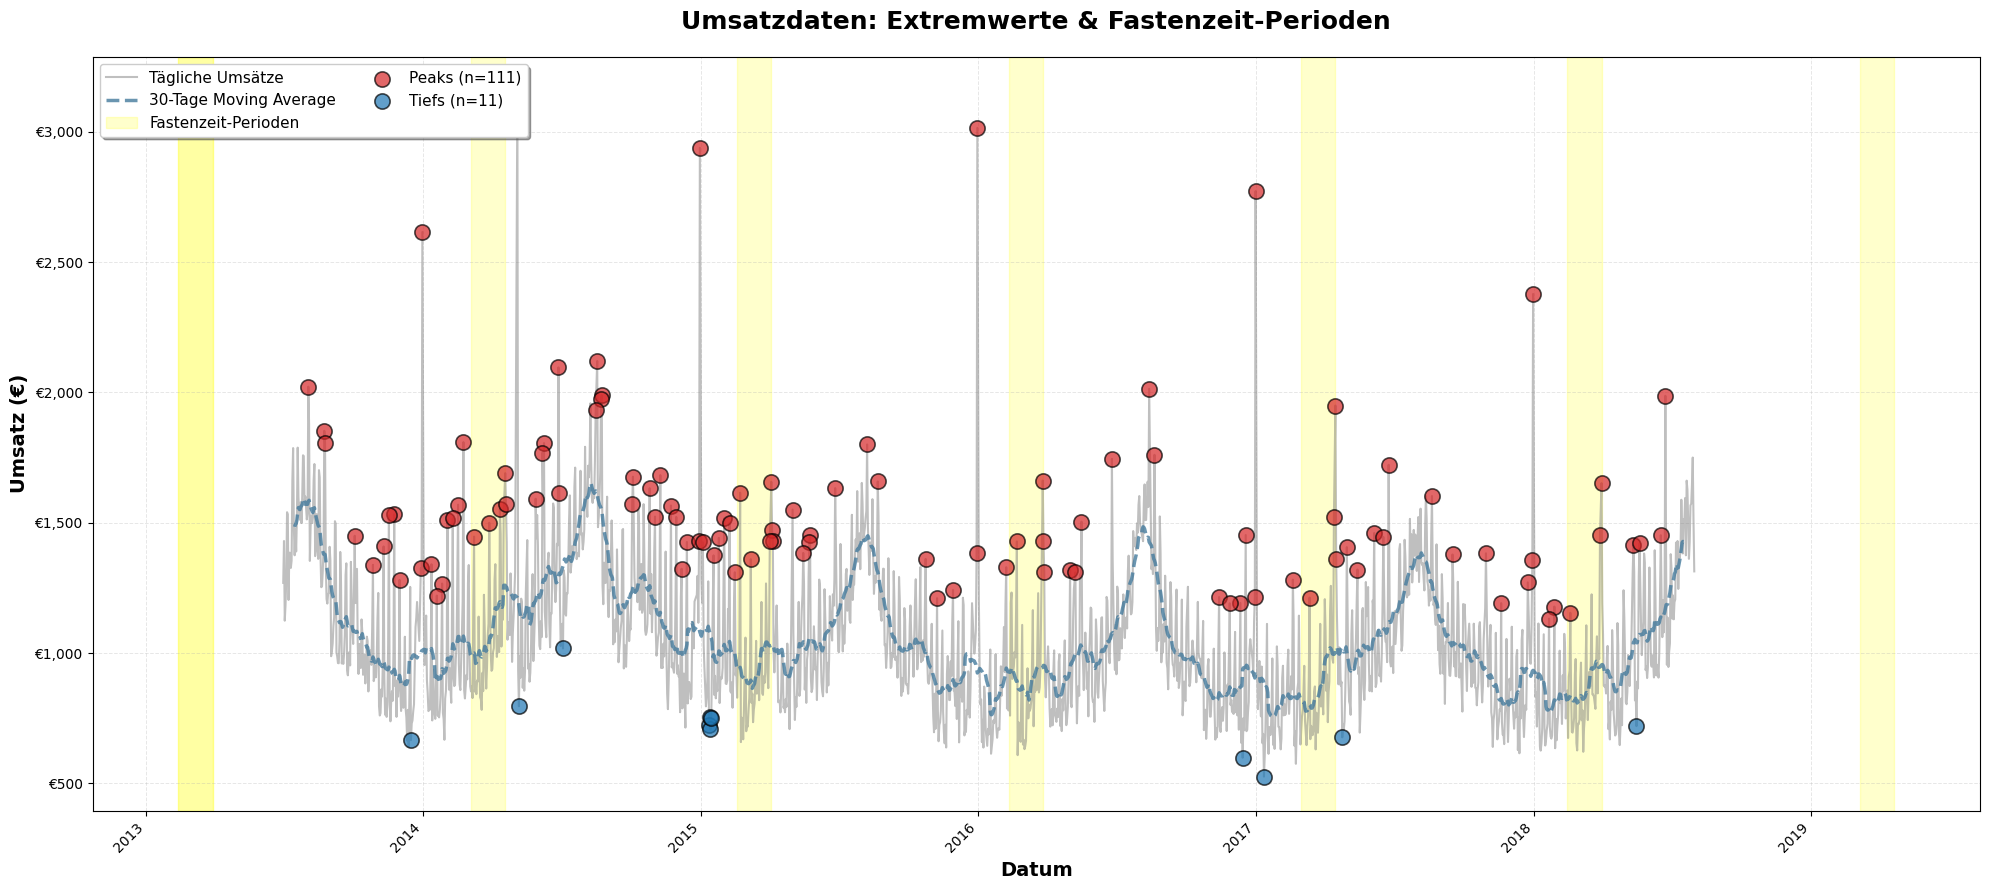

KOMBINIERTE ANALYSE: UMSATZDATEN, EXTREMWERTE & FASTENZEIT

📊 PEAKS IM VERGLEICH:
  Peaks IN Fastenzeit: 16
  Peaks AUSSERHALB Fastenzeit: 95
  Davon sind in Fastenzeit: 14.4%

💰 UMSATZ-VERGLEICH:
  Durchschnitt IN Fastenzeit: €935.85
  Durchschnitt AUSSERHALB Fastenzeit: €1,078.47
  Differenz: -13.2%
  → Umsatz ist während Fastenzeit um 13.2% NIEDRIGER

✓ Kombinierte Visualisierung erstellt


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Erstelle die kombinierte Grafik
fig, ax = plt.subplots(figsize=(20, 9))

# Plot 1: Umsatzdaten
ax.plot(daily_sales['Datum'], daily_sales['Umsatz'], 
        linewidth=1.5, color='#808080', alpha=0.5, label='Tägliche Umsätze', zorder=2)

# Plot 2: 30-Tage MA als Referenzlinie
ax.plot(daily_sales['Datum'], ma_30, 
        linewidth=2.5, color='#457B9D', linestyle='--', alpha=0.8, label='30-Tage Moving Average', zorder=3)

# Plot 3: Fastenzeit-Perioden mit gelber Hintergrund-Füllung
fastenzeit_perioden_list = [
    (pd.to_datetime('2013-02-13'), pd.to_datetime('2013-03-30')),
    (pd.to_datetime('2014-03-05'), pd.to_datetime('2014-04-19')),
    (pd.to_datetime('2015-02-18'), pd.to_datetime('2015-04-04')),
    (pd.to_datetime('2016-02-10'), pd.to_datetime('2016-03-26')),
    (pd.to_datetime('2017-03-01'), pd.to_datetime('2017-04-15')),
    (pd.to_datetime('2018-02-14'), pd.to_datetime('2018-03-31')),
    (pd.to_datetime('2019-03-06'), pd.to_datetime('2019-04-20'))
]

for i, (start, end) in enumerate(fastenzeit_perioden_list):
    # Zeichne gelben Hintergrund für Fastenzeit
    ax.axvspan(start, end, alpha=0.2, color='yellow', zorder=1)
    
    # Nur für die erste Periode ein Label in der Legende hinzufügen
    if i == 0:
        ax.axvspan(start, end, alpha=0.2, color='yellow', zorder=1, label='Fastenzeit-Perioden')

# Plot 4: Peaks und Täler
peaks_df['Datum_dt'] = pd.to_datetime(peaks_df['Datum'], format='%d.%m.%Y')
colors_map = {'Peak': '#d62728', 'Tief': '#1f77b4'}

for peak_type in ['Peak', 'Tief']:
    subset = peaks_df[peaks_df['Typ'] == peak_type]
    
    ax.scatter(subset['Datum_dt'], subset['Umsatz'], 
              s=120, color=colors_map[peak_type], marker='o', 
              alpha=0.7, label=f'{peak_type}s (n={len(subset)})', 
              edgecolors='black', linewidth=1.2, zorder=4)

# Formatierung
ax.set_title('Umsatzdaten: Extremwerte & Fastenzeit-Perioden', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Datum', fontsize=14, fontweight='bold')
ax.set_ylabel('Umsatz (€)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)

# Legende mit besserer Positionierung
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True, ncol=2)

# Formatiere Achsen
fig.autofmt_xdate(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Größere Schriftarten für bessere Lesbarkeit
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Statistik und Analyse
print("=" * 100)
print("KOMBINIERTE ANALYSE: UMSATZDATEN, EXTREMWERTE & FASTENZEIT")
print("=" * 100)

# Zähle Peaks während Fastenzeit vs. außerhalb
peaks_in_fastenzeit = 0
peaks_outside_fastenzeit = 0

for idx, row in peaks_df.iterrows():
    datum_dt = row['Datum_dt']
    in_fastenzeit = False
    
    for start, end in fastenzeit_perioden_list:
        if start <= datum_dt <= end:
            in_fastenzeit = True
            break
    
    if row['Typ'] == 'Peak':
        if in_fastenzeit:
            peaks_in_fastenzeit += 1
        else:
            peaks_outside_fastenzeit += 1

print(f"\n📊 PEAKS IM VERGLEICH:")
print(f"  Peaks IN Fastenzeit: {peaks_in_fastenzeit}")
print(f"  Peaks AUSSERHALB Fastenzeit: {peaks_outside_fastenzeit}")
print(f"  Davon sind in Fastenzeit: {peaks_in_fastenzeit/(peaks_in_fastenzeit+peaks_outside_fastenzeit)*100:.1f}%")

# Durchschnittliche Umsätze während Fastenzeit vs. außerhalb
fastenzeit_umsatz = []
non_fastenzeit_umsatz = []

for idx, row in daily_sales.iterrows():
    datum = row['Datum']
    umsatz = row['Umsatz']
    
    in_fastenzeit = False
    for start, end in fastenzeit_perioden_list:
        if start <= datum <= end:
            in_fastenzeit = True
            break
    
    if in_fastenzeit:
        fastenzeit_umsatz.append(umsatz)
    else:
        non_fastenzeit_umsatz.append(umsatz)

avg_fastenzeit = sum(fastenzeit_umsatz) / len(fastenzeit_umsatz) if fastenzeit_umsatz else 0
avg_non_fastenzeit = sum(non_fastenzeit_umsatz) / len(non_fastenzeit_umsatz) if non_fastenzeit_umsatz else 0
pct_diff = ((avg_fastenzeit - avg_non_fastenzeit) / avg_non_fastenzeit * 100) if avg_non_fastenzeit > 0 else 0

print(f"\n💰 UMSATZ-VERGLEICH:")
print(f"  Durchschnitt IN Fastenzeit: €{avg_fastenzeit:,.2f}")
print(f"  Durchschnitt AUSSERHALB Fastenzeit: €{avg_non_fastenzeit:,.2f}")
print(f"  Differenz: {pct_diff:+.1f}%")

if pct_diff < 0:
    print(f"  → Umsatz ist während Fastenzeit um {abs(pct_diff):.1f}% NIEDRIGER")
else:
    print(f"  → Umsatz ist während Fastenzeit um {pct_diff:.1f}% HÖHER")

print(f"\n✓ Kombinierte Visualisierung erstellt")

## Kombinierte Visualisierung: Extremwerte mit Fastenzeit-Perioden

TRUE EXTREME VALUES ANALYSIS

Total Extreme Values Found: 25
  Extreme Peaks (High Sales): 25
  Extreme Valleys (Low Sales): 0

Threshold: > 2.5 Standard Deviations from Moving Average

TOP 15 MOST EXTREME VALUES (by deviation magnitude)


,Datum,Umsatz,30-Tage MA,Abweichung %,Typ
74,31.12.2015,"€3,014.92",€923.72,+226.4%,Peak
24,05.05.2014,"€3,156.41","€1,212.97",+160.2%,Peak
46,31.12.2014,"€2,938.72","€1,080.44",+172.0%,Peak
92,31.12.2016,"€2,772.61",€919.53,+201.5%,Peak
11,31.12.2013,"€2,615.41","€1,010.21",+158.9%,Peak
111,31.12.2017,"€2,377.80",€933.66,+154.7%,Peak
97,15.04.2017,"€1,949.71","€1,001.47",+94.7%,Peak
121,23.06.2018,"€1,987.07","€1,171.09",+69.7%,Peak
29,28.06.2014,"€2,096.21","€1,295.00",+61.9%,Peak
18,23.02.2014,"€1,809.35","€1,065.10",+69.9%,Peak



TOP 10 LOWEST SALES VALUES (Lowest Valleys)


,Datum,Umsatz
0,2017-01-11,€525.97
1,2017-02-22,€575.16
2,2016-12-14,€598.39
3,2017-01-12,€603.01
4,2016-02-22,€608.41
5,2017-01-17,€613.53
6,2016-01-18,€613.85
7,2017-12-13,€615.53
8,2018-03-07,€621.23
9,2018-01-10,€625.87


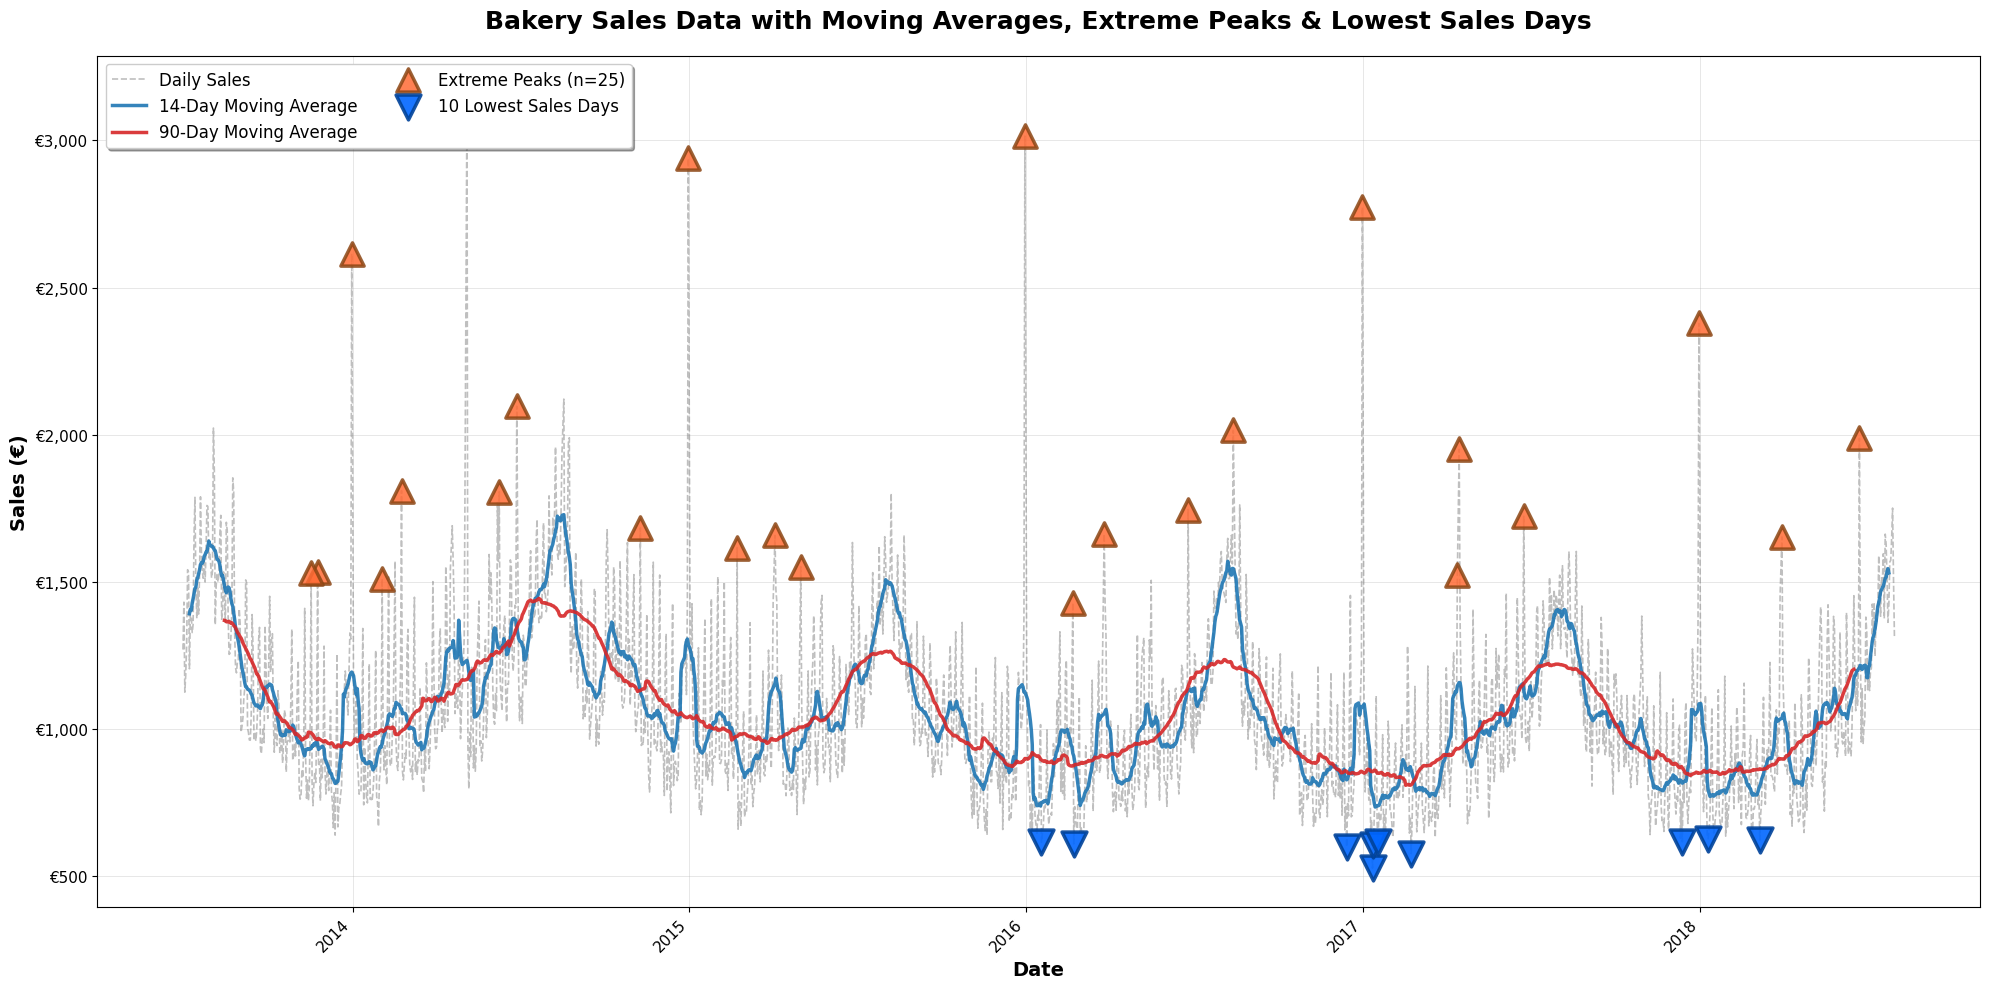


INSIGHTS

📈 EXTREME PEAKS (High Sales):
  Count: 25
  Average Deviation: +90.0%
  Maximum Peak: 31.12.2015 (+226.4%)

🔵 TOP 10 LOWEST SALES DAYS:
  Count: 10
  Lowest Sale: €525.97
  Highest in Lowest 10: €625.87
  Average of Lowest 10: €600.10

✓ Visualization with extreme peaks and lowest sales days created


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for only EXTREME values
extreme_peaks_df = peaks_df[peaks_df['Kategorie'] == 'EXTREM'].copy()
extreme_peaks_df['Datum_dt'] = pd.to_datetime(extreme_peaks_df['Datum'], format='%d.%m.%Y')

# Also get the 10 lowest values (not just extreme valleys, but actual lowest sales)
lowest_valleys = daily_sales.nsmallest(10, 'Umsatz').copy()
lowest_valleys['Datum_dt'] = lowest_valleys['Datum']
lowest_valleys_list = lowest_valleys['Datum_dt'].tolist()

print("=" * 100)
print("TRUE EXTREME VALUES ANALYSIS")
print("=" * 100)
print(f"\nTotal Extreme Values Found: {len(extreme_peaks_df)}")
print(f"  Extreme Peaks (High Sales): {len(extreme_peaks_df[extreme_peaks_df['Typ'] == 'Peak'])}")
print(f"  Extreme Valleys (Low Sales): {len(extreme_peaks_df[extreme_peaks_df['Typ'] == 'Tief'])}")
print(f"\nThreshold: > 2.5 Standard Deviations from Moving Average")

# Show extreme values
print("\n" + "=" * 100)
print("TOP 15 MOST EXTREME VALUES (by deviation magnitude)")
print("=" * 100)
display_df = extreme_peaks_df.nlargest(15, 'Abs_Abweichung')[['Datum', 'Umsatz', '30-Tage MA', 'Abweichung %', 'Typ']].copy()
display_df['Umsatz'] = display_df['Umsatz'].apply(lambda x: f"€{x:,.2f}")
display_df['30-Tage MA'] = display_df['30-Tage MA'].apply(lambda x: f"€{x:,.2f}")
display_df['Abweichung %'] = display_df['Abweichung %'].apply(lambda x: f"{x:+.1f}%")
display(display_df)

# Show the 10 lowest sales values
print("\n" + "=" * 100)
print("TOP 10 LOWEST SALES VALUES (Lowest Valleys)")
print("=" * 100)
lowest_display = lowest_valleys[['Datum', 'Umsatz']].copy()
lowest_display['Umsatz'] = lowest_display['Umsatz'].apply(lambda x: f"€{x:,.2f}")
lowest_display.reset_index(drop=True, inplace=True)
display(lowest_display)

# Create the visualization
fig, ax = plt.subplots(figsize=(20, 10))

# Plot 1: Daily sales (gray dashed line)
ax.plot(daily_sales['Datum'], daily_sales['Umsatz'], 
        linewidth=1.2, color='#808080', linestyle='--', alpha=0.5, 
        label='Daily Sales', zorder=2)

# Plot 2: 14-day Moving Average (blue)
ax.plot(daily_sales['Datum'], daily_sales['MA_14'], 
        linewidth=2.5, color='#1f77b4', label='14-Day Moving Average', 
        zorder=3, alpha=0.9)

# Plot 3: 90-day Moving Average (red)
ax.plot(daily_sales['Datum'], daily_sales['MA_90'], 
        linewidth=2.5, color='#d62728', label='90-Day Moving Average', 
        zorder=4, alpha=0.9)

# Plot 4: Only EXTREME peaks and valleys with different styling
extreme_peaks = extreme_peaks_df[extreme_peaks_df['Typ'] == 'Peak']
extreme_valleys = extreme_peaks_df[extreme_peaks_df['Typ'] == 'Tief']

# Plot extreme peaks (high sales) - Orange triangles pointing up
if len(extreme_peaks) > 0:
    ax.scatter(extreme_peaks['Datum_dt'], extreme_peaks['Umsatz'], 
              s=280, color='#ff6b35', marker='^',
              alpha=0.85, label=f'Extreme Peaks (n={len(extreme_peaks)})', 
              edgecolors='#8B4513', linewidth=2.5, zorder=5)

# Plot extreme valleys (low sales) - Blue triangles pointing down
if len(extreme_valleys) > 0:
    ax.scatter(extreme_valleys['Datum_dt'], extreme_valleys['Umsatz'], 
              s=280, color='#004e89', marker='v',
              alpha=0.85, label=f'Extreme Valleys (n={len(extreme_valleys)})', 
              edgecolors='#003d6b', linewidth=2.5, zorder=5)

# Plot the 10 lowest values - Blue triangles pointing down
ax.scatter(lowest_valleys['Datum_dt'], lowest_valleys['Umsatz'], 
          s=320, color='#0066ff', marker='v',
          alpha=0.9, label=f'10 Lowest Sales Days', 
          edgecolors='#004299', linewidth=2.5, zorder=6)

# Formatting
ax.set_title('Bakery Sales Data with Moving Averages, Extreme Peaks & Lowest Sales Days', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Sales (€)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.7)

# Legend
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, ncol=2)

# Format axes
fig.autofmt_xdate(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("INSIGHTS")
print("=" * 100)

if len(extreme_peaks) > 0:
    avg_peak_deviation = extreme_peaks['Abweichung %'].mean()
    max_peak = extreme_peaks.nlargest(1, 'Abweichung %').iloc[0]
    print(f"\n📈 EXTREME PEAKS (High Sales):")
    print(f"  Count: {len(extreme_peaks)}")
    print(f"  Average Deviation: {avg_peak_deviation:+.1f}%")
    print(f"  Maximum Peak: {max_peak['Datum']} ({max_peak['Abweichung %']:+.1f}%)")

if len(extreme_valleys) > 0:
    avg_valley_deviation = extreme_valleys['Abweichung %'].mean()
    min_valley = extreme_valleys.nsmallest(1, 'Abweichung %').iloc[0]
    max_valley = extreme_valleys.nlargest(1, 'Abweichung %').iloc[0]
    print(f"\n📉 EXTREME VALLEYS (Statistical Low Sales):")
    print(f"  Count: {len(extreme_valleys)}")
    print(f"  Average Deviation: {avg_valley_deviation:+.1f}%")
    print(f"  Minimum Valley: {min_valley['Datum']} ({min_valley['Abweichung %']:+.1f}%)")

if len(lowest_valleys) > 0:
    min_sales = lowest_valleys['Umsatz'].min()
    max_sales_in_lowest = lowest_valleys['Umsatz'].max()
    avg_lowest = lowest_valleys['Umsatz'].mean()
    print(f"\n🔵 TOP 10 LOWEST SALES DAYS:")
    print(f"  Count: {len(lowest_valleys)}")
    print(f"  Lowest Sale: €{min_sales:,.2f}")
    print(f"  Highest in Lowest 10: €{max_sales_in_lowest:,.2f}")
    print(f"  Average of Lowest 10: €{avg_lowest:,.2f}")

print(f"\n✓ Visualization with extreme peaks and lowest sales days created")


Fastenzeit periods in sales data range: 5
  05.03.2014 to 19.04.2014
  18.02.2015 to 04.04.2015
  10.02.2016 to 26.03.2016
  01.03.2017 to 15.04.2017
  14.02.2018 to 31.03.2018


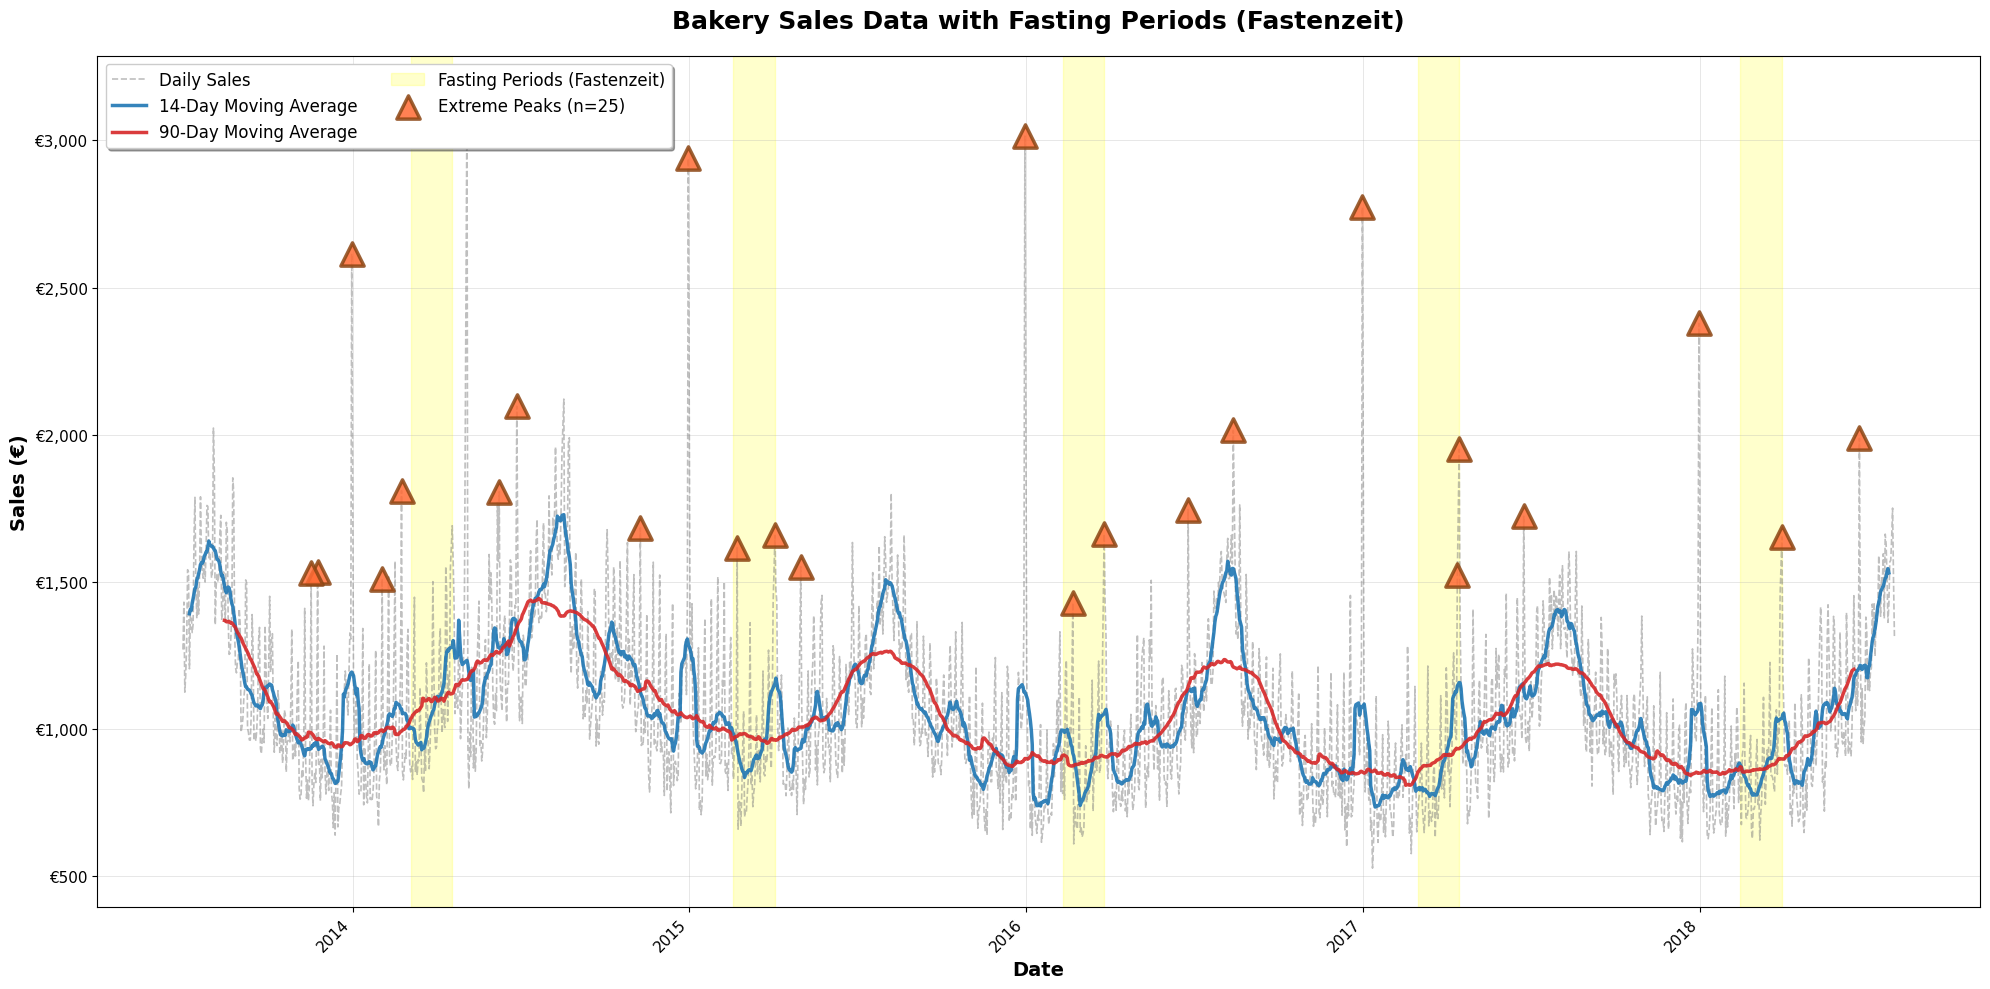


FASTENZEIT (FASTING PERIOD) ANALYSIS

📊 Sales Comparison:
  Days in Fasting Periods: 224
  Days outside Fasting Periods: 1595

💰 Average Sales:
  During Fastenzeit: €935.85
  Outside Fastenzeit: €1,078.47
  Difference: -13.2%
  → Sales are 13.2% LOWER during fasting periods

📈 Extreme Peaks Distribution:
  Peaks during Fastenzeit: 7
  Peaks outside Fastenzeit: 18
  Percentage in Fastenzeit: 28.0%

✓ English visualization with fasting periods created


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter fastenzeit periods to only those within the sales data range
fastenzeit_perioden_list = [
    (pd.to_datetime('2013-02-13'), pd.to_datetime('2013-03-30')),
    (pd.to_datetime('2014-03-05'), pd.to_datetime('2014-04-19')),
    (pd.to_datetime('2015-02-18'), pd.to_datetime('2015-04-04')),
    (pd.to_datetime('2016-02-10'), pd.to_datetime('2016-03-26')),
    (pd.to_datetime('2017-03-01'), pd.to_datetime('2017-04-15')),
    (pd.to_datetime('2018-02-14'), pd.to_datetime('2018-03-31')),
    (pd.to_datetime('2019-03-06'), pd.to_datetime('2019-04-20'))
]

# Filter only periods that overlap with sales data
sales_start = daily_sales['Datum'].min()
sales_end = daily_sales['Datum'].max()
fastenzeit_in_range = []

for start, end in fastenzeit_perioden_list:
    # Check if period overlaps with sales data
    if end >= sales_start and start <= sales_end:
        # Clip to sales data range
        clipped_start = max(start, sales_start)
        clipped_end = min(end, sales_end)
        fastenzeit_in_range.append((clipped_start, clipped_end))

print(f"Fastenzeit periods in sales data range: {len(fastenzeit_in_range)}")
for start, end in fastenzeit_in_range:
    print(f"  {start.strftime('%d.%m.%Y')} to {end.strftime('%d.%m.%Y')}")

# Create the ENGLISH visualization with Fastenzeit periods
fig, ax = plt.subplots(figsize=(20, 10))

# Plot 1: Daily sales (gray dashed line)
ax.plot(daily_sales['Datum'], daily_sales['Umsatz'], 
        linewidth=1.2, color='#808080', linestyle='--', alpha=0.5, 
        label='Daily Sales', zorder=2)

# Plot 2: 14-day Moving Average (blue)
ax.plot(daily_sales['Datum'], daily_sales['MA_14'], 
        linewidth=2.5, color='#1f77b4', label='14-Day Moving Average', 
        zorder=3, alpha=0.9)

# Plot 3: 90-day Moving Average (red)
ax.plot(daily_sales['Datum'], daily_sales['MA_90'], 
        linewidth=2.5, color='#d62728', label='90-Day Moving Average', 
        zorder=4, alpha=0.9)

# Plot 4: Fastenzeit periods with yellow background
for i, (start, end) in enumerate(fastenzeit_in_range):
    if i == 0:
        ax.axvspan(start, end, alpha=0.2, color='yellow', zorder=1, label='Fasting Periods (Fastenzeit)')
    else:
        ax.axvspan(start, end, alpha=0.2, color='yellow', zorder=1)

# Plot 5: Only EXTREME peaks with different styling
extreme_peaks_df = peaks_df[peaks_df['Kategorie'] == 'EXTREM'].copy()
extreme_peaks_df['Datum_dt'] = pd.to_datetime(extreme_peaks_df['Datum'], format='%d.%m.%Y')

extreme_peaks = extreme_peaks_df[extreme_peaks_df['Typ'] == 'Peak']

# Plot extreme peaks (high sales) - Orange triangles pointing up
if len(extreme_peaks) > 0:
    ax.scatter(extreme_peaks['Datum_dt'], extreme_peaks['Umsatz'], 
              s=280, color='#ff6b35', marker='^',
              alpha=0.85, label=f'Extreme Peaks (n={len(extreme_peaks)})', 
              edgecolors='#8B4513', linewidth=2.5, zorder=5)

# Formatting
ax.set_title('Bakery Sales Data with Fasting Periods (Fastenzeit)', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Sales (€)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.7)

# Legend
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, ncol=2)

# Format axes
fig.autofmt_xdate(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("FASTENZEIT (FASTING PERIOD) ANALYSIS")
print("=" * 100)

# Calculate sales during and outside fasting periods
fastenzeit_sales = []
outside_sales = []

for idx, row in daily_sales.iterrows():
    datum = row['Datum']
    umsatz = row['Umsatz']
    
    in_fastenzeit = False
    for start, end in fastenzeit_in_range:
        if start <= datum <= end:
            in_fastenzeit = True
            break
    
    if in_fastenzeit:
        fastenzeit_sales.append(umsatz)
    else:
        outside_sales.append(umsatz)

avg_fastenzeit = sum(fastenzeit_sales) / len(fastenzeit_sales) if fastenzeit_sales else 0
avg_outside = sum(outside_sales) / len(outside_sales) if outside_sales else 0
pct_change = ((avg_fastenzeit - avg_outside) / avg_outside * 100) if avg_outside > 0 else 0

print(f"\n📊 Sales Comparison:")
print(f"  Days in Fasting Periods: {len(fastenzeit_sales)}")
print(f"  Days outside Fasting Periods: {len(outside_sales)}")
print(f"\n💰 Average Sales:")
print(f"  During Fastenzeit: €{avg_fastenzeit:,.2f}")
print(f"  Outside Fastenzeit: €{avg_outside:,.2f}")
print(f"  Difference: {pct_change:+.1f}%")

if pct_change < 0:
    print(f"  → Sales are {abs(pct_change):.1f}% LOWER during fasting periods")
else:
    print(f"  → Sales are {pct_change:.1f}% HIGHER during fasting periods")

# Count peaks during fasting periods
peaks_in_fastenzeit = 0
peaks_outside_fastenzeit = 0

for idx, row in extreme_peaks.iterrows():
    datum_dt = row['Datum_dt']
    in_fastenzeit = False
    
    for start, end in fastenzeit_in_range:
        if start <= datum_dt <= end:
            in_fastenzeit = True
            break
    
    if in_fastenzeit:
        peaks_in_fastenzeit += 1
    else:
        peaks_outside_fastenzeit += 1

print(f"\n📈 Extreme Peaks Distribution:")
print(f"  Peaks during Fastenzeit: {peaks_in_fastenzeit}")
print(f"  Peaks outside Fastenzeit: {peaks_outside_fastenzeit}")

if (peaks_in_fastenzeit + peaks_outside_fastenzeit) > 0:
    pct_peaks_in_fast = (peaks_in_fastenzeit / (peaks_in_fastenzeit + peaks_outside_fastenzeit)) * 100
    print(f"  Percentage in Fastenzeit: {pct_peaks_in_fast:.1f}%")

print(f"\n✓ English visualization with fasting periods created")


## Sales Data with Moving Averages & True Extreme Values (English)